In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None  # default='warn' surpress chain assignment warning

from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

#import nltk
#nltk.download('all') 

import numpy as np

# import re                                  
# import string
# from nltk.corpus import wordnet
# from nltk.corpus import brown
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer
# from nltk.stem import WordNetLemmatizer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import coo_matrix, hstack

#from textblob import Word

#from collections import Counter

#import gensim

from numpy import savetxt
import numpy as np
import scipy.sparse

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#import torch

# turn off userwarnings
import warnings
warnings.filterwarnings('ignore')

#pip install tokenization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from scipy.sparse import load_npz

# Paths to features from each extraction method
# NepalEQ_hashtag_arr_matrix_path = '/content/drive/MyDrive/NepalEQ_hashtag_arr_matrix.npy'
QueenslandFLD_hashtag_arr_matrix_path = '/content/drive/MyDrive/QueenslandFLD_hashtag_arr_matrix.npy'
# NepalEQ_retweet_arr_matrix_path = '/content/drive/MyDrive/NepalEQ_retweet_arr_matrix.npy'
# QueenslandFLD_retweet_arr_matrix_path = '/content/drive/MyDrive/QueenslandFLD_retweet_arr_matrix.npy'
# NepalEQ_df_em_1gram_matrix_path = '/content/drive/MyDrive/NepalEQ_df_em_1gram_matrix.npy'
# QueenslandFLD_df_em_1gram_matrix_path = '/content/drive/MyDrive/QueenslandFLD_df_em_1gram_matrix.npy'
# NepalEQ_POS_matrix_path = '/content/drive/MyDrive/NepalEQ_POS_matrix.npy'
QueenslandFLD_POS_matrix_path = '/content/drive/MyDrive/QueenslandFLD_POS_matrix.npy'
# NepalEQ_df_embeddings_fasttext_matrix_path = '/content/drive/MyDrive/NepalEQ_df_embeddings_fasttext_matrix.npy'
QueenslandFLD_df_embeddings_fasttext_matrix_path = '/content/drive/MyDrive/QueenslandFLD_df_embeddings_fasttext_matrix.npy'
# NepalEQ_df_embeddings_word2vec_matrix_path = '/content/drive/MyDrive/NepalEQ_df_embeddings_word2vec_matrix.npy'
QueenslandFLD_df_embeddings_word2vec_matrix_path = '/content/drive/MyDrive/QueenslandFLD_df_embeddings_word2vec_matrix.npy'
# NepalEQ_df_embeddings_glove_matrix_path = '/content/drive/MyDrive/NepalEQ_df_embeddings_glove_matrix.npy'
QueenslandFLD_df_embeddings_glove_matrix_path = '/content/drive/MyDrive/QueenslandFLD_df_embeddings_glove_matrix.npy'
# NepalEQ_df_bert_input_matrix_path = '/content/drive/MyDrive/NepalEQ_df_bert_input_matrix.npy'
QueenslandFLD_df_bert_input_matrix_path = '/content/drive/MyDrive/QueenslandFLD_df_bert_input_matrix.npy'
# NepalEQ_df_tfidf_1gram_matrix_path = '/content/drive/MyDrive/NepalEQ_df_tfidf_1gram_matrix.npy'
QueenslandFLD_df_tfidf_1gram_matrix_path = '/content/drive/MyDrive/QueenslandFLD_df_tfidf_1gram_matrix.npy'
# NepalEQ_TFIDF_HT_RT_POS_FT_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_FT_hstack.npy'
# QueenslandFLD_TFIDF_HT_RT_POS_FT_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_RT_POS_FT_hstack.npy'
# NepalEQ_TFIDF_HT_RT_POS_w2v_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_w2v_hstack.npy'
# QueenslandFLD_TFIDF_HT_RT_POS_w2v_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_RT_POS_w2v_hstack.npy'
# NepalEQ_TFIDF_HT_RT_POS_glove_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_glove_hstack.npy'
# QueenslandFLD_TFIDF_HT_RT_POS_glove_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_RT_POS_glove_hstack.npy'
# NepalEQ_TFIDF_HT_RT_POS_bert_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_bert_hstack.npy'
# QueenslandFLD_TFIDF_HT_RT_POS_bert_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_RT_POS_bert_hstack.npy'
# NepalEQ_TFIDF_HT_POS_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_POS_hstack.npy'
# QueenslandFLD_TFIDF_HT_POS_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_POS_hstack.npy'
QueenslandFLD_TFIDF_HT_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_hstack.npy'
QueenslandFLD_HT_POS_hstack_path = '/content/drive/MyDrive/QueenslandFLD_HT_POS_hstack.npy'
QueenslandFLD_HT_FT_hstack_path = '/content/drive/MyDrive/QueenslandFLD_HT_FT_hstack.npy'
QueenslandFLD_HT_glove_hstack_path = '/content/drive/MyDrive/QueenslandFLD_HT_glove_hstack.npy'
QueenslandFLD_HT_w2v_hstack_path = '/content/drive/MyDrive/QueenslandFLD_HT_w2v_hstack.npy'
QueenslandFLD_HT_bert_hstack_path = '/content/drive/MyDrive/QueenslandFLD_HT_bert_hstack.npy'
QueenslandFLD_POS_FT_hstack_path = '/content/drive/MyDrive/QueenslandFLD_POS_FT_hstack.npy'
QueenslandFLD_POS_glove_hstack_path = '/content/drive/MyDrive/QueenslandFLD_POS_glove_hstack.npy'
QueenslandFLD_POS_w2v_hstack_path = '/content/drive/MyDrive/QueenslandFLD_POS_w2v_hstack.npy'
QueenslandFLD_POS_bert_hstack_path = '/content/drive/MyDrive/QueenslandFLD_POS_bert_hstack.npy'
QueenslandFLD_TFIDF_POS_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_POS_hstack.npy'
QueenslandFLD_TFIDF_FT_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_FT_hstack.npy'
QueenslandFLD_TFIDF_glove_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_glove_hstack.npy'
QueenslandFLD_TFIDF_w2v_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_w2v_hstack.npy'
QueenslandFLD_TFIDF_bert_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_bert_hstack.npy'
QueenslandFLD_TFIDF_HT_POS_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_POS_hstack.npy'
QueenslandFLD_TFIDF_HT_FT_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_FT_hstack.npy'
QueenslandFLD_TFIDF_HT_glove_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_glove_hstack.npy'
QueenslandFLD_TFIDF_HT_w2v_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_w2v_hstack.npy'
QueenslandFLD_TFIDF_HT_bert_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_bert_hstack.npy'
QueenslandFLD_TFIDF_HT_POS_FT_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_POS_FT_hstack.npy'
QueenslandFLD_TFIDF_HT_POS_glove_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_POS_glove_hstack.npy'
QueenslandFLD_TFIDF_HT_POS_w2v_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_POS_w2v_hstack.npy'
QueenslandFLD_TFIDF_HT_POS_BERT_hstack_path = '/content/drive/MyDrive/QueenslandFLD_TFIDF_HT_POS_BERT_hstack.npy'




# Paths to traget variables 
NepalEQ_df_target_path = '/content/drive/MyDrive/NepalEQ_df_label.npy'
QueenslandFLD_df_target = '/content/drive/MyDrive/QueenslandFLD_df_label.npy'

# load features
# NepalEQ_hashtag = np.load(NepalEQ_hashtag_arr_matrix_path)
QueenslandFLD_df_tfidf_1gram = np.load(QueenslandFLD_df_tfidf_1gram_matrix_path)
QueenslandFLD_hashtag = np.load(QueenslandFLD_hashtag_arr_matrix_path)
# NepalEQ_retweet = np.load(NepalEQ_retweet_arr_matrix_path)
# QueenslandFLD_retweet = np.load(QueenslandFLD_retweet_arr_matrix_path)
# NepalEQ_df_em_1gram = np.load(NepalEQ_df_em_1gram_matrix_path)
# QueenslandFLD_df_em_1gram = np.load(QueenslandFLD_df_em_1gram_matrix_path)
# NepalEQ_POS = np.load(NepalEQ_POS_matrix_path)
QueenslandFLD_POS = np.load(QueenslandFLD_POS_matrix_path)
# NepalEQ_df_embeddings_fasttext = np.load(NepalEQ_df_embeddings_fasttext_matrix_path)
QueenslandFLD_df_embeddings_fasttext = np.load(QueenslandFLD_df_embeddings_fasttext_matrix_path)
QueenslandFLD_df_embeddings_glove = np.load(QueenslandFLD_df_embeddings_glove_matrix_path)
# NepalEQ_df_embeddings_word2vec = np.load(NepalEQ_df_embeddings_word2vec_matrix_path)
QueenslandFLD_df_embeddings_word2vec = np.load(QueenslandFLD_df_embeddings_word2vec_matrix_path)
# NepalEQ_df_embeddings_glove = np.load(NepalEQ_df_embeddings_glove_matrix_path)
# NepalEQ_df_bert_input = np.load(NepalEQ_df_bert_input_matrix_path)
QueenslandFLD_df_bert_input = np.load(QueenslandFLD_df_bert_input_matrix_path)
# NepalEQ_df_tfidf_1gram = np.load(NepalEQ_df_tfidf_1gram_matrix_path)
# NepalEQ_TFIDF_HT_RT_POS_FT = np.load(NepalEQ_TFIDF_HT_RT_POS_FT_hstack_path)
# QueenslandFLD_TFIDF_HT_RT_POS_FT = np.load(QueenslandFLD_TFIDF_HT_RT_POS_FT_hstack_path)
# NepalEQ_TFIDF_HT_RT_POS_w2v = np.load(NepalEQ_TFIDF_HT_RT_POS_w2v_hstack_path)
# QueenslandFLD_TFIDF_HT_RT_POS_w2v = np.load(QueenslandFLD_TFIDF_HT_RT_POS_w2v_hstack_path)
# NepalEQ_TFIDF_HT_RT_POS_glove = np.load(NepalEQ_TFIDF_HT_RT_POS_glove_hstack_path)
# QueenslandFLD_TFIDF_HT_RT_POS_glove = np.load(QueenslandFLD_TFIDF_HT_RT_POS_glove_hstack_path)
# NepalEQ_TFIDF_HT_RT_POS_bert = np.load(NepalEQ_TFIDF_HT_RT_POS_bert_hstack_path)
# QueenslandFLD_TFIDF_HT_RT_POS_bert = np.load(QueenslandFLD_TFIDF_HT_RT_POS_bert_hstack_path)
# NepalEQ_TFIDF_HT_POS = np.load(NepalEQ_TFIDF_HT_POS_hstack_path)
# QueenslandFLD_TFIDF_HT_POS = np.load(QueenslandFLD_TFIDF_HT_POS_hstack_path)
QueenslandFLD_TFIDF_HT_hstack = np.load(QueenslandFLD_TFIDF_HT_hstack_path)
QueenslandFLD_HT_POS_hstack = np.load(QueenslandFLD_HT_POS_hstack_path)
QueenslandFLD_HT_FT_hstack = np.load(QueenslandFLD_HT_FT_hstack_path)
QueenslandFLD_HT_glove_hstack = np.load(QueenslandFLD_HT_glove_hstack_path)
QueenslandFLD_HT_w2v_hstack = np.load(QueenslandFLD_HT_w2v_hstack_path)
QueenslandFLD_HT_bert_hstack = np.load(QueenslandFLD_HT_bert_hstack_path)
QueenslandFLD_POS_FT_hstack = np.load(QueenslandFLD_POS_FT_hstack_path)
QueenslandFLD_POS_glove_hstack = np.load(QueenslandFLD_POS_glove_hstack_path)
QueenslandFLD_POS_w2v_hstack = np.load(QueenslandFLD_POS_w2v_hstack_path)
QueenslandFLD_POS_bert_hstack = np.load(QueenslandFLD_POS_bert_hstack_path)
QueenslandFLD_TFIDF_POS_hstack = np.load(QueenslandFLD_TFIDF_POS_hstack_path)
QueenslandFLD_TFIDF_FT_hstack = np.load(QueenslandFLD_TFIDF_FT_hstack_path)
QueenslandFLD_TFIDF_glove_hstack = np.load(QueenslandFLD_TFIDF_glove_hstack_path)
QueenslandFLD_TFIDF_w2v_hstack = np.load(QueenslandFLD_TFIDF_w2v_hstack_path)
QueenslandFLD_TFIDF_bert_hstack = np.load(QueenslandFLD_TFIDF_bert_hstack_path)
QueenslandFLD_TFIDF_HT_POS_hstack = np.load(QueenslandFLD_TFIDF_HT_POS_hstack_path)
QueenslandFLD_TFIDF_HT_FT_hstack = np.load(QueenslandFLD_TFIDF_HT_FT_hstack_path)
QueenslandFLD_TFIDF_HT_glove_hstack = np.load(QueenslandFLD_TFIDF_HT_glove_hstack_path)
QueenslandFLD_TFIDF_HT_w2v_hstack = np.load(QueenslandFLD_TFIDF_HT_w2v_hstack_path)
QueenslandFLD_TFIDF_HT_bert_hstack = np.load(QueenslandFLD_TFIDF_HT_bert_hstack_path)
QueenslandFLD_TFIDF_HT_POS_FT_hstack = np.load(QueenslandFLD_TFIDF_HT_POS_FT_hstack_path)
QueenslandFLD_TFIDF_HT_POS_glove_hstack = np.load(QueenslandFLD_TFIDF_HT_POS_glove_hstack_path)
QueenslandFLD_TFIDF_HT_POS_w2v_hstack = np.load(QueenslandFLD_TFIDF_HT_POS_w2v_hstack_path)
QueenslandFLD_TFIDF_HT_POS_BERT_hstack = np.load(QueenslandFLD_TFIDF_HT_POS_BERT_hstack_path)


# load targets
# NepalEQ_df_target = np.load(NepalEQ_df_target_path)
QueenslandFLD_target = np.load(QueenslandFLD_df_target)


df_list = [QueenslandFLD_hashtag, QueenslandFLD_POS, QueenslandFLD_df_embeddings_fasttext, QueenslandFLD_df_embeddings_word2vec, 
           QueenslandFLD_df_embeddings_glove, QueenslandFLD_df_bert_input, QueenslandFLD_df_tfidf_1gram, 
           QueenslandFLD_TFIDF_HT_hstack, QueenslandFLD_HT_POS_hstack, QueenslandFLD_HT_FT_hstack, 
           QueenslandFLD_HT_glove_hstack, QueenslandFLD_HT_w2v_hstack, QueenslandFLD_HT_bert_hstack, 
           QueenslandFLD_POS_FT_hstack, QueenslandFLD_POS_glove_hstack, QueenslandFLD_POS_w2v_hstack, 
           QueenslandFLD_POS_bert_hstack, QueenslandFLD_TFIDF_POS_hstack, QueenslandFLD_TFIDF_FT_hstack, 
           QueenslandFLD_TFIDF_glove_hstack, QueenslandFLD_TFIDF_w2v_hstack, QueenslandFLD_TFIDF_bert_hstack, 
           QueenslandFLD_TFIDF_HT_POS_hstack, QueenslandFLD_TFIDF_HT_FT_hstack, QueenslandFLD_TFIDF_HT_glove_hstack, QueenslandFLD_TFIDF_HT_w2v_hstack, 
           QueenslandFLD_TFIDF_HT_bert_hstack, QueenslandFLD_TFIDF_HT_POS_FT_hstack, QueenslandFLD_TFIDF_HT_POS_glove_hstack, 
           QueenslandFLD_TFIDF_HT_POS_w2v_hstack, QueenslandFLD_TFIDF_HT_POS_BERT_hstack]
df_names = ['QueenslandFLD_hashtag', 'QueenslandFLD_POS', 'QueenslandFLD_df_embeddings_fasttext', 'QueenslandFLD_df_embeddings_word2vec', 
           'QueenslandFLD_df_embeddings_glove', 'QueenslandFLD_df_bert_input', 'QueenslandFLD_df_tfidf_1gram', 
           'QueenslandFLD_TFIDF_HT_hstack', 'QueenslandFLD_HT_POS_hstack', 'QueenslandFLD_HT_FT_hstack', 
           'QueenslandFLD_HT_glove_hstack', 'QueenslandFLD_HT_w2v_hstack', 'QueenslandFLD_HT_bert_hstack', 
           'QueenslandFLD_POS_FT_hstack', 'QueenslandFLD_POS_glove_hstack', 'QueenslandFLD_POS_w2v_hstack', 
           'QueenslandFLD_POS_bert_hstack', 'QueenslandFLD_TFIDF_POS_hstack', 'QueenslandFLD_TFIDF_FT_hstack', 
           'QueenslandFLD_TFIDF_glove_hstack', 'QueenslandFLD_TFIDF_w2v_hstack', 'QueenslandFLD_TFIDF_bert_hstack', 
           'QueenslandFLD_TFIDF_HT_POS_hstack', 'QueenslandFLD_TFIDF_HT_FT_hstack', 'QueenslandFLD_TFIDF_HT_glove_hstack', 'QueenslandFLD_TFIDF_HT_w2v_hstack', 
           'QueenslandFLD_TFIDF_HT_bert_hstack', 'QueenslandFLD_TFIDF_HT_POS_FT_hstack', 'QueenslandFLD_TFIDF_HT_POS_glove_hstack', 
           'QueenslandFLD_TFIDF_HT_POS_w2v_hstack', 'QueenslandFLD_TFIDF_HT_POS_BERT_hstack']

In [3]:
# from scipy.sparse import load_npz

# # Paths to features from each extraction method
# # NepalEQ_hashtag_arr_matrix_path = '/content/drive/MyDrive/NepalEQ_hashtag_arr_matrix.npy'
# NepalEQ_hashtag_arr_matrix_path = '/content/drive/MyDrive/NepalEQ_hashtag_arr_matrix.npy'
# # NepalEQ_retweet_arr_matrix_path = '/content/drive/MyDrive/NepalEQ_retweet_arr_matrix.npy'
# # NepalEQ_retweet_arr_matrix_path = '/content/drive/MyDrive/NepalEQ_retweet_arr_matrix.npy'
# # NepalEQ_df_em_1gram_matrix_path = '/content/drive/MyDrive/NepalEQ_df_em_1gram_matrix.npy'
# # NepalEQ_df_em_1gram_matrix_path = '/content/drive/MyDrive/NepalEQ_df_em_1gram_matrix.npy'
# # NepalEQ_POS_matrix_path = '/content/drive/MyDrive/NepalEQ_POS_matrix.npy'
# NepalEQ_POS_matrix_path = '/content/drive/MyDrive/NepalEQ_POS_matrix.npy'
# # NepalEQ_df_embeddings_fasttext_matrix_path = '/content/drive/MyDrive/NepalEQ_df_embeddings_fasttext_matrix.npy'
# NepalEQ_df_embeddings_fasttext_matrix_path = '/content/drive/MyDrive/NepalEQ_df_embeddings_fasttext_matrix.npy'
# # NepalEQ_df_embeddings_word2vec_matrix_path = '/content/drive/MyDrive/NepalEQ_df_embeddings_word2vec_matrix.npy'
# NepalEQ_df_embeddings_word2vec_matrix_path = '/content/drive/MyDrive/NepalEQ_df_embeddings_word2vec_matrix.npy'
# # NepalEQ_df_embeddings_glove_matrix_path = '/content/drive/MyDrive/NepalEQ_df_embeddings_glove_matrix.npy'
# NepalEQ_df_embeddings_glove_matrix_path = '/content/drive/MyDrive/NepalEQ_df_embeddings_glove_matrix.npy'
# # NepalEQ_df_bert_input_matrix_path = '/content/drive/MyDrive/NepalEQ_df_bert_input_matrix.npy'
# NepalEQ_df_bert_input_matrix_path = '/content/drive/MyDrive/NepalEQ_df_bert_input_matrix.npy'
# # NepalEQ_df_tfidf_1gram_matrix_path = '/content/drive/MyDrive/NepalEQ_df_tfidf_1gram_matrix.npy'
# NepalEQ_df_tfidf_1gram_matrix_path = '/content/drive/MyDrive/NepalEQ_df_tfidf_1gram_matrix.npy'
# # NepalEQ_TFIDF_HT_RT_POS_FT_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_FT_hstack.npy'
# # NepalEQ_TFIDF_HT_RT_POS_FT_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_FT_hstack.npy'
# # NepalEQ_TFIDF_HT_RT_POS_w2v_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_w2v_hstack.npy'
# # NepalEQ_TFIDF_HT_RT_POS_w2v_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_w2v_hstack.npy'
# # NepalEQ_TFIDF_HT_RT_POS_glove_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_glove_hstack.npy'
# # NepalEQ_TFIDF_HT_RT_POS_glove_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_glove_hstack.npy'
# # NepalEQ_TFIDF_HT_RT_POS_bert_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_bert_hstack.npy'
# # NepalEQ_TFIDF_HT_RT_POS_bert_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_RT_POS_bert_hstack.npy'
# # NepalEQ_TFIDF_HT_POS_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_POS_hstack.npy'
# # NepalEQ_TFIDF_HT_POS_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_POS_hstack.npy'
# NepalEQ_TFIDF_HT_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_hstack.npy'
# NepalEQ_HT_POS_hstack_path = '/content/drive/MyDrive/NepalEQ_HT_POS_hstack.npy'
# NepalEQ_HT_FT_hstack_path = '/content/drive/MyDrive/NepalEQ_HT_FT_hstack.npy'
# NepalEQ_HT_glove_hstack_path = '/content/drive/MyDrive/NepalEQ_HT_glove_hstack.npy'
# NepalEQ_HT_w2v_hstack_path = '/content/drive/MyDrive/NepalEQ_HT_w2v_hstack.npy'
# NepalEQ_HT_bert_hstack_path = '/content/drive/MyDrive/NepalEQ_HT_bert_hstack.npy'
# NepalEQ_POS_FT_hstack_path = '/content/drive/MyDrive/NepalEQ_POS_FT_hstack.npy'
# NepalEQ_POS_glove_hstack_path = '/content/drive/MyDrive/NepalEQ_POS_glove_hstack.npy'
# NepalEQ_POS_w2v_hstack_path = '/content/drive/MyDrive/NepalEQ_POS_w2v_hstack.npy'
# NepalEQ_POS_bert_hstack_path = '/content/drive/MyDrive/NepalEQ_POS_bert_hstackk.npy'
# NepalEQ_TFIDF_POS_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_POS_hstack.npy'
# NepalEQ_TFIDF_FT_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_FT_hstack.npy'
# NepalEQ_TFIDF_glove_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_glove_hstack.npy'
# NepalEQ_TFIDF_w2v_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_w2v_hstack.npy'
# NepalEQ_TFIDF_bert_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_bert_hstack.npy'
# NepalEQ_TFIDF_HT_POS_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_POS_hstack.npy'
# NepalEQ_TFIDF_HT_FT_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_FT_hstack.npy'
# NepalEQ_TFIDF_HT_glove_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_glove_hstack.npy'
# NepalEQ_TFIDF_HT_w2v_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_w2v_hstack.npy'
# NepalEQ_TFIDF_HT_bert_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_bert_hstack.npy'
# NepalEQ_TFIDF_HT_POS_FT_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_POS_FT_hstack.npy'
# NepalEQ_TFIDF_HT_POS_glove_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_POS_glove_hstack.npy'
# NepalEQ_TFIDF_HT_POS_w2v_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_POS_w2v_hstack.npy'
# NepalEQ_TFIDF_HT_POS_BERT_hstack_path = '/content/drive/MyDrive/NepalEQ_TFIDF_HT_POS_BERT_hstack.npy'




# # Paths to traget variables 
# NepalEQ_df_target_path = '/content/drive/MyDrive/NepalEQ_df_label.npy'
# NepalEQ_df_target = '/content/drive/MyDrive/NepalEQ_df_label.npy'

# # load features



# # NepalEQ_hashtag = np.load(NepalEQ_hashtag_arr_matrix_path)
# # NepalEQ_retweet = np.load(NepalEQ_retweet_arr_matrix_path)
# # NepalEQ_retweet = np.load(NepalEQ_retweet_arr_matrix_path)
# # NepalEQ_df_em_1gram = np.load(NepalEQ_df_em_1gram_matrix_path)
# # NepalEQ_df_em_1gram = np.load(NepalEQ_df_em_1gram_matrix_path)
# # NepalEQ_POS = np.load(NepalEQ_POS_matrix_path)
# # NepalEQ_df_embeddings_fasttext = np.load(NepalEQ_df_embeddings_fasttext_matrix_path)
# # NepalEQ_df_embeddings_word2vec = np.load(NepalEQ_df_embeddings_word2vec_matrix_path)
# # NepalEQ_df_embeddings_glove = np.load(NepalEQ_df_embeddings_glove_matrix_path)
# # NepalEQ_df_bert_input = np.load(NepalEQ_df_bert_input_matrix_path)
# # NepalEQ_df_tfidf_1gram = np.load(NepalEQ_df_tfidf_1gram_matrix_path)
# # NepalEQ_TFIDF_HT_RT_POS_FT = np.load(NepalEQ_TFIDF_HT_RT_POS_FT_hstack_path)
# # NepalEQ_TFIDF_HT_RT_POS_FT = np.load(NepalEQ_TFIDF_HT_RT_POS_FT_hstack_path)
# # NepalEQ_TFIDF_HT_RT_POS_w2v = np.load(NepalEQ_TFIDF_HT_RT_POS_w2v_hstack_path)
# # NepalEQ_TFIDF_HT_RT_POS_w2v = np.load(NepalEQ_TFIDF_HT_RT_POS_w2v_hstack_path)
# # NepalEQ_TFIDF_HT_RT_POS_glove = np.load(NepalEQ_TFIDF_HT_RT_POS_glove_hstack_path)
# # NepalEQ_TFIDF_HT_RT_POS_glove = np.load(NepalEQ_TFIDF_HT_RT_POS_glove_hstack_path)
# # NepalEQ_TFIDF_HT_RT_POS_bert = np.load(NepalEQ_TFIDF_HT_RT_POS_bert_hstack_path)
# # NepalEQ_TFIDF_HT_RT_POS_bert = np.load(NepalEQ_TFIDF_HT_RT_POS_bert_hstack_path)
# # NepalEQ_TFIDF_HT_POS = np.load(NepalEQ_TFIDF_HT_POS_hstack_path)
# # NepalEQ_TFIDF_HT_POS = np.load(NepalEQ_TFIDF_HT_POS_hstack_path)


# NepalEQ_hashtag = np.load(NepalEQ_hashtag_arr_matrix_path)
# NepalEQ_POS = np.load(NepalEQ_POS_matrix_path)
# NepalEQ_df_embeddings_fasttext = np.load(NepalEQ_df_embeddings_fasttext_matrix_path)
# NepalEQ_df_embeddings_word2vec = np.load(NepalEQ_df_embeddings_word2vec_matrix_path)
# NepalEQ_df_embeddings_glove = np.load(NepalEQ_df_embeddings_glove_matrix_path)
# NepalEQ_df_bert_input = np.load(NepalEQ_df_bert_input_matrix_path)
# NepalEQ_df_tfidf_1gram = np.load(NepalEQ_df_tfidf_1gram_matrix_path)
# NepalEQ_TFIDF_HT_hstack = np.load(NepalEQ_TFIDF_HT_hstack_path)
# NepalEQ_HT_POS_hstack = np.load(NepalEQ_HT_POS_hstack_path)
# NepalEQ_HT_FT_hstack = np.load(NepalEQ_HT_FT_hstack_path)
# NepalEQ_HT_glove_hstack = np.load(NepalEQ_HT_glove_hstack_path)
# NepalEQ_HT_w2v_hstack = np.load(NepalEQ_HT_w2v_hstack_path)
# NepalEQ_HT_bert_hstack = np.load(NepalEQ_HT_bert_hstack_path)
# NepalEQ_POS_FT_hstack = np.load(NepalEQ_POS_FT_hstack_path)
# NepalEQ_POS_glove_hstack = np.load(NepalEQ_POS_glove_hstack_path)
# NepalEQ_POS_w2v_hstack = np.load(NepalEQ_POS_w2v_hstack_path)
# NepalEQ_POS_bert_hstack = np.load(NepalEQ_POS_bert_hstack_path)
# NepalEQ_TFIDF_POS_hstack = np.load(NepalEQ_TFIDF_POS_hstack_path)
# NepalEQ_TFIDF_FT_hstack = np.load(NepalEQ_TFIDF_FT_hstack_path)
# NepalEQ_TFIDF_glove_hstack = np.load(NepalEQ_TFIDF_glove_hstack_path)
# NepalEQ_TFIDF_w2v_hstack = np.load(NepalEQ_TFIDF_w2v_hstack_path)
# NepalEQ_TFIDF_bert_hstack = np.load(NepalEQ_TFIDF_bert_hstack_path)
# NepalEQ_TFIDF_HT_POS_hstack = np.load(NepalEQ_TFIDF_HT_POS_hstack_path)
# NepalEQ_TFIDF_HT_FT_hstack = np.load(NepalEQ_TFIDF_HT_FT_hstack_path)
# NepalEQ_TFIDF_HT_glove_hstack = np.load(NepalEQ_TFIDF_HT_glove_hstack_path)
# NepalEQ_TFIDF_HT_w2v_hstack = np.load(NepalEQ_TFIDF_HT_w2v_hstack_path)

# # NepalEQ_TFIDF_HT_bert_hstack = np.load(NepalEQ_TFIDF_HT_bert_hstack_path)
# # NepalEQ_TFIDF_HT_POS_FT_hstack = np.load(NepalEQ_TFIDF_HT_POS_FT_hstack_path)
# # NepalEQ_TFIDF_HT_POS_glove_hstack = np.load(NepalEQ_TFIDF_HT_POS_glove_hstack_path)
# # NepalEQ_TFIDF_HT_POS_w2v_hstack = np.load(NepalEQ_TFIDF_HT_POS_w2v_hstack_path)
# # NepalEQ_TFIDF_HT_POS_BERT_hstack = np.load(NepalEQ_TFIDF_HT_POS_BERT_hstack_path)


# # load targets
# NepalEQ_df_target = np.load(NepalEQ_df_target_path)
# # NepalEQ_target = np.load(NepalEQ_df_target)


# df_list = [NepalEQ_hashtag, NepalEQ_POS, NepalEQ_df_embeddings_fasttext, NepalEQ_df_embeddings_word2vec, 
#            NepalEQ_df_embeddings_glove, NepalEQ_df_bert_input, NepalEQ_df_tfidf_1gram, 
#            NepalEQ_TFIDF_HT_hstack, NepalEQ_HT_POS_hstack, NepalEQ_HT_FT_hstack, 
#            NepalEQ_HT_glove_hstack, NepalEQ_HT_w2v_hstack, NepalEQ_HT_bert_hstack, 
#            NepalEQ_POS_FT_hstack, NepalEQ_POS_glove_hstack, NepalEQ_POS_w2v_hstack, 
#            NepalEQ_POS_bert_hstack, NepalEQ_TFIDF_POS_hstack, NepalEQ_TFIDF_FT_hstack, 
#            NepalEQ_TFIDF_glove_hstack, NepalEQ_TFIDF_w2v_hstack, NepalEQ_TFIDF_bert_hstack, 
#            NepalEQ_TFIDF_HT_POS_hstack, NepalEQ_TFIDF_HT_FT_hstack, NepalEQ_TFIDF_HT_glove_hstack, NepalEQ_TFIDF_HT_w2v_hstack] 

# # df_list = [NepalEQ_TFIDF_HT_bert_hstack, NepalEQ_TFIDF_HT_POS_FT_hstack, NepalEQ_TFIDF_HT_POS_glove_hstack, 
# #            NepalEQ_TFIDF_HT_POS_w2v_hstack, NepalEQ_TFIDF_HT_POS_BERT_hstack]

# df_names = ['NepalEQ_hashtag', 'NepalEQ_POS', 'NepalEQ_df_embeddings_fasttext', 'NepalEQ_df_embeddings_word2vec', 
#            'NepalEQ_df_embeddings_glove', 'NepalEQ_df_bert_input', 'NepalEQ_df_tfidf_1gram', 
#            'NepalEQ_TFIDF_HT_hstack', 'NepalEQ_HT_POS_hstack', 'NepalEQ_HT_FT_hstack', 
#            'NepalEQ_HT_glove_hstack', 'NepalEQ_HT_w2v_hstack', 'NepalEQ_HT_bert_hstack', 
#            'NepalEQ_POS_FT_hstack', 'NepalEQ_POS_glove_hstack', 'NepalEQ_POS_w2v_hstack', 
#            'NepalEQ_POS_bert_hstack', 'NepalEQ_TFIDF_POS_hstack', 'NepalEQ_TFIDF_FT_hstack', 
#            'NepalEQ_TFIDF_glove_hstack', 'NepalEQ_TFIDF_w2v_hstack', 'NepalEQ_TFIDF_bert_hstack', 
#            'NepalEQ_TFIDF_HT_POS_hstack', 'NepalEQ_TFIDF_HT_FT_hstack', 'NepalEQ_TFIDF_HT_glove_hstack', 'NepalEQ_TFIDF_HT_w2v_hstack'] 


# # df_names = ['NepalEQ_TFIDF_HT_bert_hstack', 'NepalEQ_TFIDF_HT_POS_FT_hstack', 'NepalEQ_TFIDF_HT_POS_glove_hstack', 
# #              'NepalEQ_TFIDF_HT_POS_w2v_hstack', 'NepalEQ_TFIDF_HT_POS_BERT_hstack']

In [4]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
# from sklearn.metrics import f1_score, roc_auc_score

# y = QueenslandFLD_target


# for X, n in zip(df_list, df_names):
#   y = QueenslandFLD_target
#   # split into train test sets
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)


#   # Initialize the random forest estimator
#   # Note that the number of trees is not setup here
#   RF = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)

#   oob_list = list()

#   # Iterate through all of the possibilities for 
#   # number of trees
#   for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
#     # Use this to set the number of trees
#     RF.set_params(n_estimators=n_trees)

#     # Fit the model
#     RF.fit(X_train, y_train)

#     # Get the oob error
#     oob_error = 1 - RF.oob_score_
    
#     # Store it
#     oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

#   rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

#   # rf_oob_df

#   # Initialize the random forest estimator
#   # Note that the number of trees is not setup here
#   EF = ExtraTreesClassifier(oob_score=True, random_state=42, warm_start=True, bootstrap=True, n_jobs=-1)

#   oob_list = list()

#   # Iterate through all of the possibilities for 
#   # number of trees
#   for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
#     # Use this to set the number of trees
#     EF.set_params(n_estimators=n_trees)
#     EF.fit(X_train, y_train)

#     # oob error
#     oob_error = 1 - EF.oob_score_
#     oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

#   et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

#   # et_oob_df

#   # Random forest with 100 estimators
#   model = RF.set_params(n_estimators=100)

#   y_pred = model.predict(X_test)

#   cr = classification_report(y_test, y_pred)
#   # print(cr)

#   score_df = pd.DataFrame({'name': n, 'accuracy': accuracy_score(y_test, y_pred), 
#                            'precision': precision_score(y_test, y_pred),
#                            'recall': recall_score(y_test, y_pred), 'f1': f1_score(y_test, y_pred),'auc': roc_auc_score(y_test, y_pred)},index=pd.Index([0]))

#   print(score_df)

In [5]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
# from sklearn.metrics import f1_score, roc_auc_score

# y = QueenslandFLD_target

# score_dfs = []  # Empty list to store score_df

# for X, n in zip(df_list, df_names):
#   y = QueenslandFLD_target
#   # split into train test sets
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)


#   # Initialize the random forest estimator
#   # Note that the number of trees is not setup here
#   RF = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)

#   oob_list = list()

#   # Iterate through all of the possibilities for 
#   # number of trees
#   for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
#     # Use this to set the number of trees
#     RF.set_params(n_estimators=n_trees)

#     # Fit the model
#     RF.fit(X_train, y_train)

#     # Get the oob error
#     oob_error = 1 - RF.oob_score_
    
#     # Store it
#     oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

#   rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

#   # rf_oob_df

#   # Initialize the random forest estimator
#   # Note that the number of trees is not setup here
#   EF = ExtraTreesClassifier(oob_score=True, random_state=42, warm_start=True, bootstrap=True, n_jobs=-1)

#   oob_list = list()

#   # Iterate through all of the possibilities for 
#   # number of trees
#   for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
#     # Use this to set the number of trees
#     EF.set_params(n_estimators=n_trees)
#     EF.fit(X_train, y_train)

#     # oob error
#     oob_error = 1 - EF.oob_score_
#     oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

#   et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

#   # et_oob_df

#   # Random forest with 100 estimators
#   model = RF.set_params(n_estimators=100)

#   y_pred = model.predict(X_test)

#   cr = classification_report(y_test, y_pred)
#   # print(cr)

#   score_df = pd.DataFrame({'name': n, 'accuracy': accuracy_score(y_test, y_pred), 
#                            'precision': precision_score(y_test, y_pred),
#                            'recall': recall_score(y_test, y_pred), 'f1': f1_score(y_test, y_pred),'auc': roc_auc_score(y_test, y_pred)}, index=pd.Index([0]))
  
#   score_dfs.append(score_df) # Append score_df to the list

#   final_score_df = pd.concat(score_dfs)

# final_score_df # Print the final result


In [6]:
# # Save the dataframe as a CSV file
# final_score_df.to_csv('Nepal_RF2_metrics.csv', index=False)

In [7]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

y = QueenslandFLD_target

score_dfs = []  # Empty list to store score_df

for X, n in zip(df_list, df_names):
    y = QueenslandFLD_target
    # split into train test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

    # Initialize the AdaBoost classifier
    AB = AdaBoostClassifier(random_state=42)

    oob_list = list()

    # Iterate through all of the possibilities for 
    # number of estimators
    for n_estimators in [15, 20]:
        # Use this to set the number of estimators
        AB.set_params(n_estimators=n_estimators)

        # Fit the model
        AB.fit(X_train, y_train)

        # Get the oob error (if available)
        oob_error = 1 - AB.score(X_train, y_train)
        
        # Store it
        oob_list.append(pd.Series({'n_estimators': n_estimators, 'oob': oob_error}))

    ab_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_estimators')

    # ab_oob_df

    model = AB.set_params(n_estimators=5)

    y_pred = model.predict(X_test)

    cr = classification_report(y_test, y_pred)
    # print(cr)

    score_df = pd.DataFrame({'name': n, 'accuracy': accuracy_score(y_test, y_pred), 
                             'precision': precision_score(y_test, y_pred),
                             'recall': recall_score(y_test, y_pred), 'f1': f1_score(y_test, y_pred),'auc': roc_auc_score(y_test, y_pred)}, index=pd.Index([0]))
  
    score_dfs.append(score_df) # Append score_df to the list

final_score_df = pd.concat(score_dfs)

final_score_df # Print the final result


,name,accuracy,precision,recall,f1,auc
0,QueenslandFLD_hashtag,0.568660,0.971154,0.207179,0.341505,0.599980
0,QueenslandFLD_POS,0.655592,0.671193,0.709744,0.689930,0.650901
0,QueenslandFLD_df_embeddings_fasttext,0.852713,0.850643,0.882051,0.866062,0.850171
0,QueenslandFLD_df_embeddings_word2vec,0.848837,0.853119,0.869744,0.861351,0.847026
0,QueenslandFLD_df_embeddings_glove,0.843300,0.844622,0.869744,0.856998,0.841009
0,QueenslandFLD_df_bert_input,0.737542,0.757981,0.754872,0.756423,0.736040
0,QueenslandFLD_df_tfidf_1gram,0.960687,0.980851,0.945641,0.962924,0.961990
0,QueenslandFLD_TFIDF_HT_hstack,0.960687,0.980851,0.945641,0.962924,0.961990
0,QueenslandFLD_HT_POS_hstack,0.698228,0.753538,0.655385,0.701042,0.701940
0,QueenslandFLD_HT_FT_hstack,0.843854,0.843409,0.872821,0.857863,0.841344


In [8]:
# Save the dataframe as a CSV file
final_score_df.to_csv('QueenslandFLD_aRF_metrics.csv', index=False)

In [9]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

y = QueenslandFLD_target

score_dfs = []  # Empty list to store score_df

for X, n in zip(df_list, df_names):
    y = QueenslandFLD_target
    # split into train test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

    # Initialize the Bagging classifier
    BG = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

    oob_list = list()

    # Iterate through all of the possibilities for 
    # number of estimators
    for n_estimators in [15, 20]:
        # Use this to set the number of estimators
        BG.set_params(n_estimators=n_estimators)

        # Fit the model
        BG.fit(X_train, y_train)

        # Get the oob error (if available)
        oob_error = 1 - BG.score(X_train, y_train)
        
        # Store it
        oob_list.append(pd.Series({'n_estimators': n_estimators, 'oob': oob_error}))

    bg_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_estimators')

    # bg_oob_df

    model = BG.set_params(n_estimators=5)

    y_pred = model.predict(X_test)

    cr = classification_report(y_test, y_pred)
    # print(cr)

    score_df = pd.DataFrame({'name': n, 'accuracy': accuracy_score(y_test, y_pred), 
                             'precision': precision_score(y_test, y_pred),
                             'recall': recall_score(y_test, y_pred), 'f1': f1_score(y_test, y_pred),'auc': roc_auc_score(y_test, y_pred)}, index=pd.Index([0]))
  
    score_dfs.append(score_df) # Append score_df to the list

final_score_df = pd.concat(score_dfs)

final_score_df # Print the final result


,name,accuracy,precision,recall,f1,auc
0,QueenslandFLD_hashtag,0.562569,0.552827,0.992821,0.710198,0.525291
0,QueenslandFLD_POS,0.663898,0.673258,0.733333,0.702013,0.657882
0,QueenslandFLD_df_embeddings_fasttext,0.886489,0.919390,0.865641,0.891706,0.888296
0,QueenslandFLD_df_embeddings_word2vec,0.886489,0.925885,0.858462,0.890899,0.888918
0,QueenslandFLD_df_embeddings_glove,0.884275,0.923673,0.856410,0.888771,0.886689
0,QueenslandFLD_df_bert_input,0.812292,0.841935,0.803077,0.822047,0.813091
0,QueenslandFLD_df_tfidf_1gram,0.959579,0.988095,0.936410,0.961559,0.961587
0,QueenslandFLD_TFIDF_HT_hstack,0.961794,0.986052,0.942564,0.963818,0.963460
0,QueenslandFLD_HT_POS_hstack,0.704873,0.710878,0.764103,0.736530,0.699741
0,QueenslandFLD_HT_FT_hstack,0.884828,0.919126,0.862564,0.889947,0.886757


In [10]:
# Save the dataframe as a CSV file
final_score_df.to_csv('QueenslandFLD_BRF_metrics.csv', index=False)

In [13]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

y = QueenslandFLD_target

score_dfs = []  # Empty list to store score_df

for X, n in zip(df_list, df_names):
    y = QueenslandFLD_target
    # split into train test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

    # Initialize the BaggingClassifier with RandomForestClassifier as the base estimator
    RS = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

    oob_list = list()

    # Iterate through all of the possibilities for 
    # number of estimators and max features
    for n_estimators in [15, 20]:
        for max_features in [0.5, 0.6]:
            # Use this to set the number of estimators and max features
            RS.set_params(n_estimators=n_estimators, max_features=max_features)

            # Fit the model
            RS.fit(X_train, y_train)

            # Get the oob error (if available)
            oob_error = 1 - RS.score(X_train, y_train)
            
            # Store it
            oob_list.append(pd.Series({'n_estimators': n_estimators, 'max_features': max_features, 'oob': oob_error}))

    rs_oob_df = pd.concat(oob_list, axis=1).T.set_index(['n_estimators', 'max_features'])

    model = RS.set_params(n_estimators=5, max_features=0.5)

    y_pred = model.predict(X_test)

    cr = classification_report(y_test, y_pred)
    # print(cr)

    score_df = pd.DataFrame({'name': n, 'accuracy': accuracy_score(y_test, y_pred), 
                             'precision': precision_score(y_test, y_pred),
                             'recall': recall_score(y_test, y_pred), 'f1': f1_score(y_test, y_pred),'auc': roc_auc_score(y_test, y_pred)}, index=pd.Index([0]))
  
    score_dfs.append(score_df) # Append score_df to the list

final_score_df = pd.concat(score_dfs)

final_score_df # Print the final result


,name,accuracy,precision,recall,f1,auc
0,QueenslandFLD_hashtag,0.562569,0.552707,0.994872,0.710623,0.525113
0,QueenslandFLD_POS,0.668882,0.659341,0.800000,0.722892,0.657521
0,QueenslandFLD_df_embeddings_fasttext,0.885382,0.920131,0.862564,0.890418,0.887359
0,QueenslandFLD_df_embeddings_word2vec,0.884828,0.924695,0.856410,0.889244,0.887291
0,QueenslandFLD_df_embeddings_glove,0.889258,0.928177,0.861538,0.893617,0.891660
0,QueenslandFLD_df_bert_input,0.806202,0.830688,0.805128,0.817708,0.806295
0,QueenslandFLD_df_tfidf_1gram,0.956257,0.984848,0.933333,0.958399,0.958243
0,QueenslandFLD_TFIDF_HT_hstack,0.960687,0.987069,0.939487,0.962690,0.962523
0,QueenslandFLD_HT_POS_hstack,0.709302,0.702338,0.801026,0.748443,0.701355
0,QueenslandFLD_HT_FT_hstack,0.884828,0.915493,0.866667,0.890411,0.886402


In [14]:
# Save the dataframe as a CSV file
final_score_df.to_csv('QueenslandFLD_RSRF_metrics.csv', index=False)

### Hashtag

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_hashtag
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.432595
20.0,0.429489
30.0,0.434251
40.0,0.435080
50.0,0.438186
100.0,0.438807
150.0,0.447712
200.0,0.442328
300.0,0.438186


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

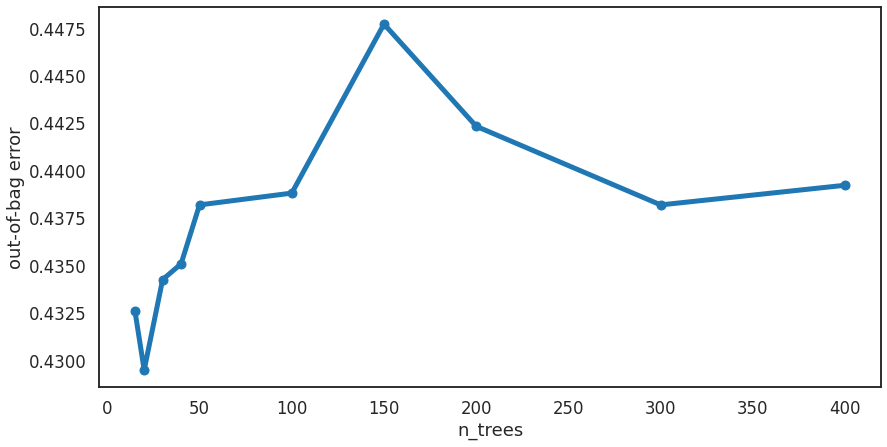

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.431973
20.0,0.429696
30.0,0.435908
40.0,0.436115
50.0,0.438600
100.0,0.442742
150.0,0.448954
200.0,0.442742
300.0,0.440050


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.432595,0.431973
20.0,0.429489,0.429696
30.0,0.434251,0.435908
40.0,0.435080,0.436115
50.0,0.438186,0.438600
100.0,0.438807,0.442742
150.0,0.447712,0.448954
200.0,0.442328,0.442742
300.0,0.438186,0.440050


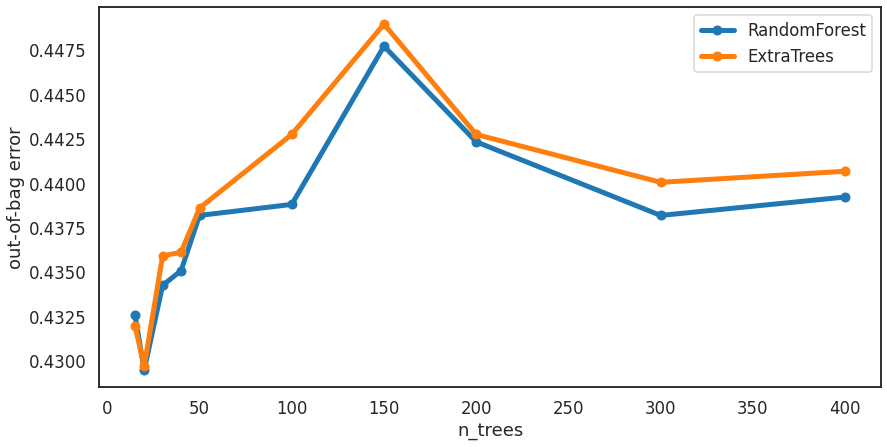

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.56      0.75      0.64      1082
           1       0.57      0.36      0.44       988

    accuracy                           0.57      2070
   macro avg       0.57      0.56      0.54      2070
weighted avg       0.57      0.57      0.55      2070



,accuracy,precision,recall,f1,auc
0,0.565217,0.570968,0.3583,0.440299,0.556229


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_hashtag
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.445051
20.0,0.443152
30.0,0.443390
40.0,0.442915
50.0,0.443390
100.0,0.442915
150.0,0.442677
200.0,0.442915
300.0,0.443152


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

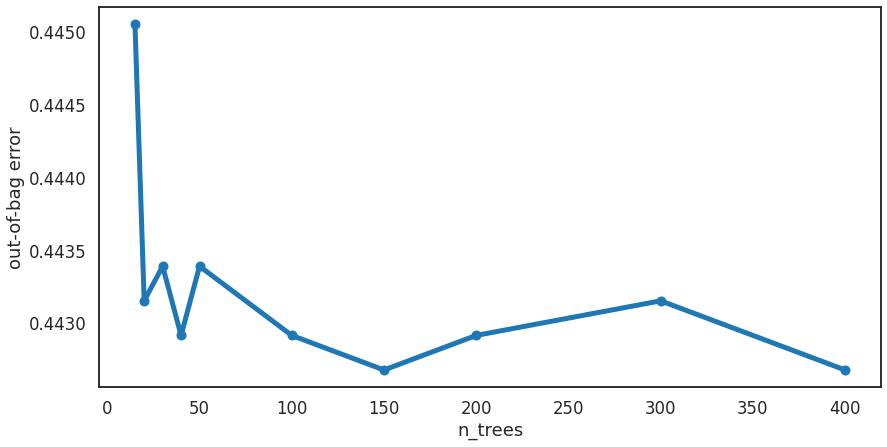

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.444102
20.0,0.442440
30.0,0.443627
40.0,0.442677
50.0,0.443390
100.0,0.442677
150.0,0.442440
200.0,0.442440
300.0,0.442677


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.445051,0.444102
20.0,0.443152,0.442440
30.0,0.443390,0.443627
40.0,0.442915,0.442677
50.0,0.443390,0.443390
100.0,0.442915,0.442677
150.0,0.442677,0.442440
200.0,0.442915,0.442440
300.0,0.443152,0.442677


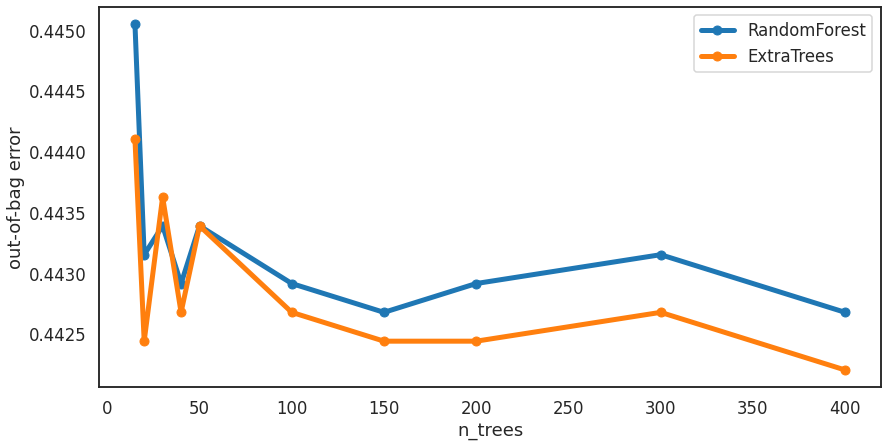

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.91      0.06      0.11       831
           1       0.55      0.99      0.71       975

    accuracy                           0.56      1806
   macro avg       0.73      0.53      0.41      1806
weighted avg       0.72      0.56      0.43      1806



,accuracy,precision,recall,f1,auc
0,0.563677,0.553337,0.994872,0.711144,0.526317


### Retweets

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_retweet
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.477324
20.0,0.477324
30.0,0.477324
40.0,0.477324
50.0,0.477324
100.0,0.477324
150.0,0.477324
200.0,0.477324
300.0,0.477324


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

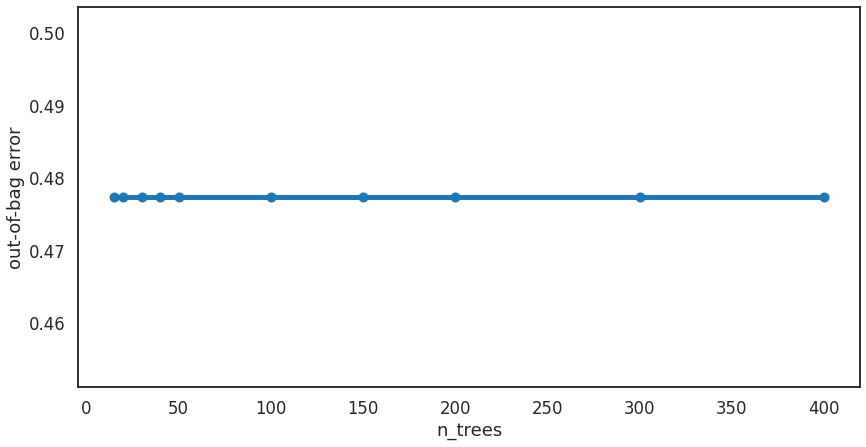

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.477324
20.0,0.477324
30.0,0.477324
40.0,0.477324
50.0,0.477324
100.0,0.477324
150.0,0.477324
200.0,0.477324
300.0,0.477324


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.477324,0.477324
20.0,0.477324,0.477324
30.0,0.477324,0.477324
40.0,0.477324,0.477324
50.0,0.477324,0.477324
100.0,0.477324,0.477324
150.0,0.477324,0.477324
200.0,0.477324,0.477324
300.0,0.477324,0.477324


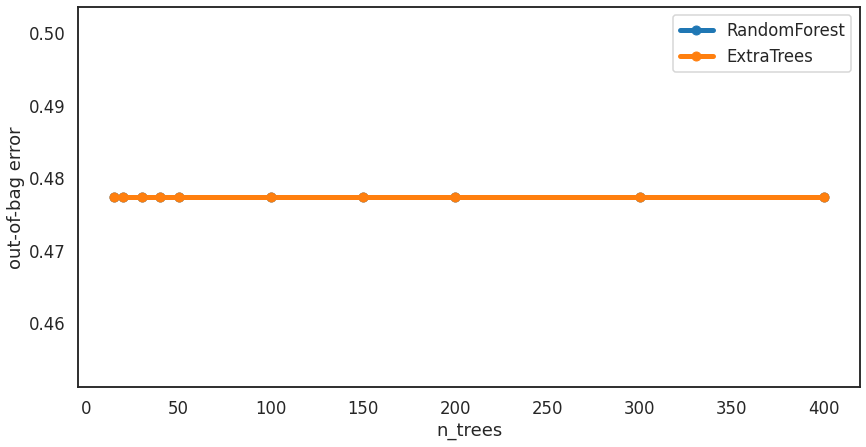

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.52      1.00      0.69      1082
           1       0.00      0.00      0.00       988

    accuracy                           0.52      2070
   macro avg       0.26      0.50      0.34      2070
weighted avg       0.27      0.52      0.36      2070



,accuracy,precision,recall,f1,auc
0,0.522705,0.0,0.0,0.0,0.5


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_retweet
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.460242
20.0,0.460005
30.0,0.460479
40.0,0.460479
50.0,0.460479
100.0,0.460479
150.0,0.460479
200.0,0.460479
300.0,0.460479


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

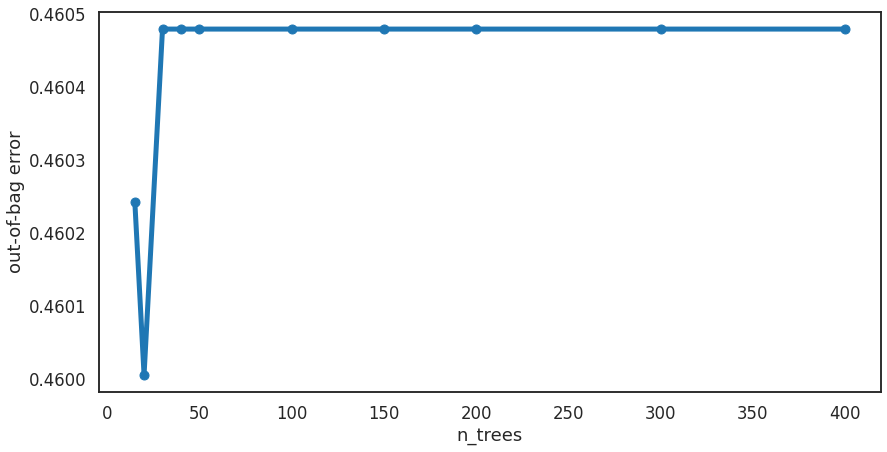

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.460242
20.0,0.460005
30.0,0.460479
40.0,0.460479
50.0,0.460479
100.0,0.460479
150.0,0.460479
200.0,0.460479
300.0,0.460479


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.460242,0.460242
20.0,0.460005,0.460005
30.0,0.460479,0.460479
40.0,0.460479,0.460479
50.0,0.460479,0.460479
100.0,0.460479,0.460479
150.0,0.460479,0.460479
200.0,0.460479,0.460479
300.0,0.460479,0.460479


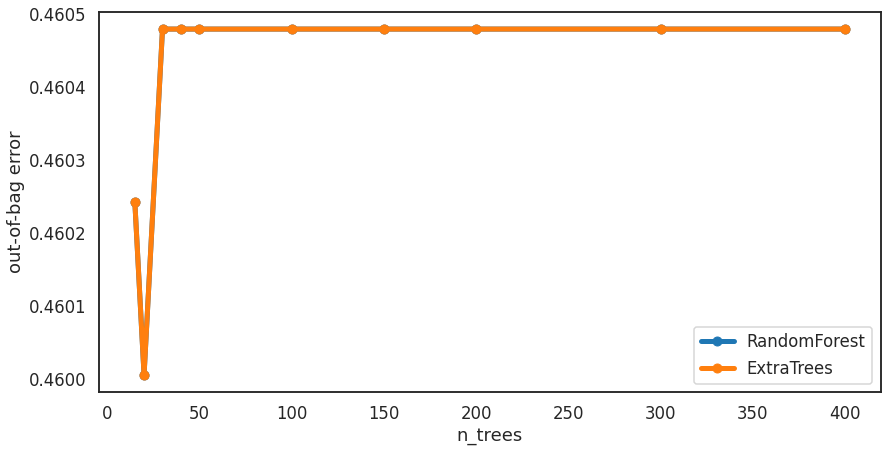

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       831
           1       0.54      1.00      0.70       975

    accuracy                           0.54      1806
   macro avg       0.27      0.50      0.35      1806
weighted avg       0.29      0.54      0.38      1806



,accuracy,precision,recall,f1,auc
0,0.539867,0.539867,1.0,0.701187,0.5


### BOW

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_df_em_1gram
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.307310
20.0,0.299027
30.0,0.280596
40.0,0.269828
50.0,0.260924
100.0,0.261131
150.0,0.258232
200.0,0.256575
300.0,0.256161


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

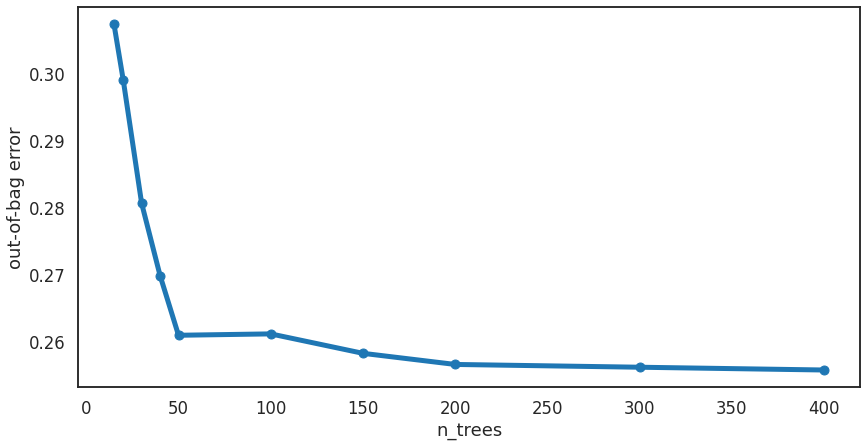

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.307724
20.0,0.298405
30.0,0.283703
40.0,0.275212
50.0,0.269621
100.0,0.263409
150.0,0.260302
200.0,0.256575
300.0,0.254711


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.307310,0.307724
20.0,0.299027,0.298405
30.0,0.280596,0.283703
40.0,0.269828,0.275212
50.0,0.260924,0.269621
100.0,0.261131,0.263409
150.0,0.258232,0.260302
200.0,0.256575,0.256575
300.0,0.256161,0.254711


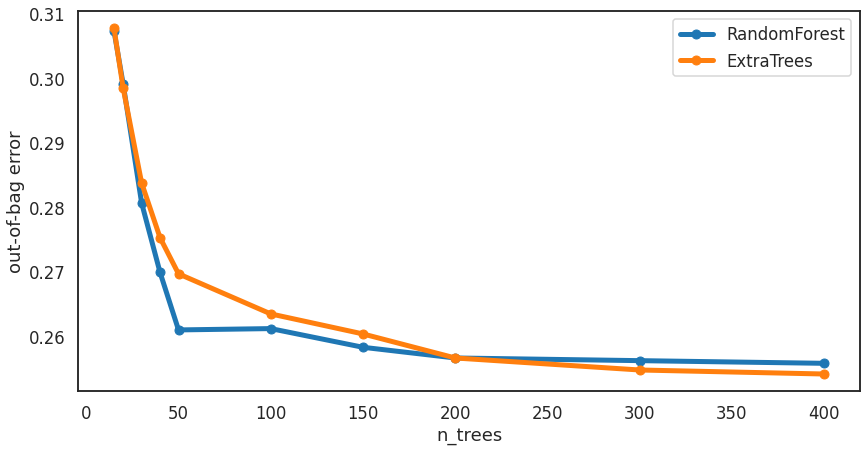

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1082
           1       0.80      0.71      0.75       988

    accuracy                           0.78      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.78      0.77      2070



,accuracy,precision,recall,f1,auc
0,0.775845,0.798405,0.709514,0.75134,0.772964


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_df_em_1gram
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.062426
20.0,0.055305
30.0,0.049134
40.0,0.046048
50.0,0.044386
100.0,0.040351
150.0,0.039164
200.0,0.038215
300.0,0.038927


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

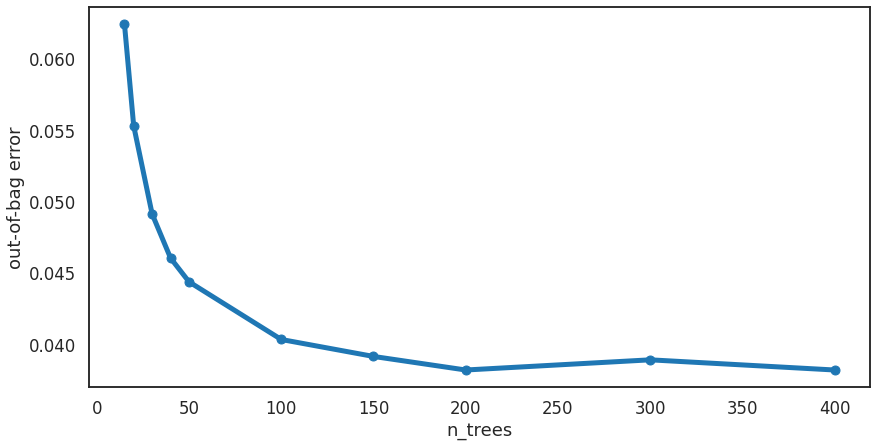

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.061239
20.0,0.054593
30.0,0.046760
40.0,0.046048
50.0,0.045099
100.0,0.044624
150.0,0.042250
200.0,0.041301
300.0,0.040826


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.062426,0.061239
20.0,0.055305,0.054593
30.0,0.049134,0.046760
40.0,0.046048,0.046048
50.0,0.044386,0.045099
100.0,0.040351,0.044624
150.0,0.039164,0.042250
200.0,0.038215,0.041301
300.0,0.038927,0.040826


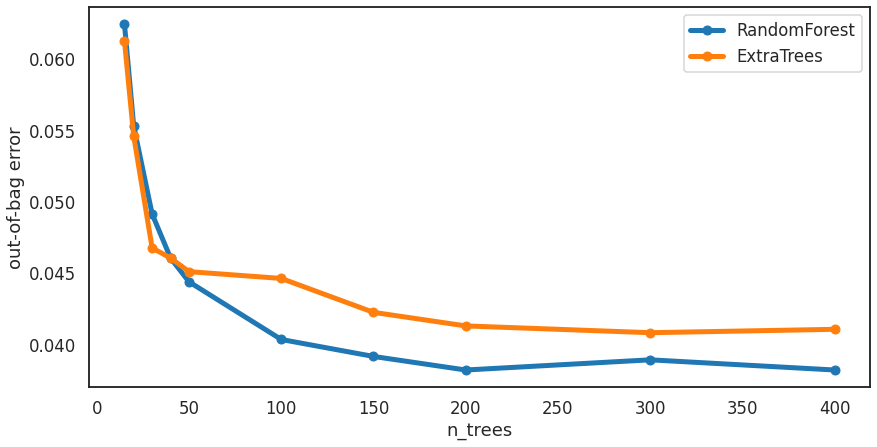

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       831
           1       0.99      0.94      0.97       975

    accuracy                           0.96      1806
   macro avg       0.96      0.97      0.96      1806
weighted avg       0.96      0.96      0.96      1806



,accuracy,precision,recall,f1,auc
0,0.963455,0.990291,0.941538,0.9653,0.965354


### POS

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_POS
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.451646
20.0,0.445641
30.0,0.445227
40.0,0.443777
50.0,0.446676
100.0,0.443363
150.0,0.443777
200.0,0.443363
300.0,0.436322


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

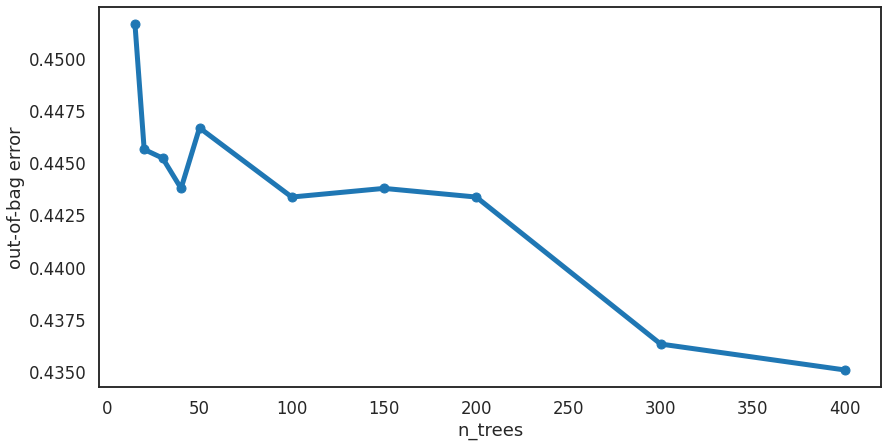

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.452060
20.0,0.446262
30.0,0.444398
40.0,0.443984
50.0,0.447712
100.0,0.443570
150.0,0.443984
200.0,0.441913
300.0,0.435287


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.451646,0.452060
20.0,0.445641,0.446262
30.0,0.445227,0.444398
40.0,0.443777,0.443984
50.0,0.446676,0.447712
100.0,0.443363,0.443570
150.0,0.443777,0.443984
200.0,0.443363,0.441913
300.0,0.436322,0.435287


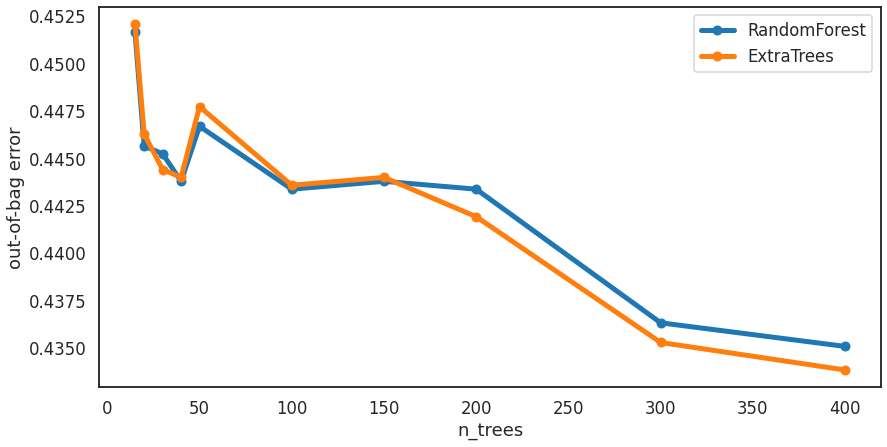

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1082
           1       0.52      0.52      0.52       988

    accuracy                           0.54      2070
   macro avg       0.54      0.54      0.54      2070
weighted avg       0.54      0.54      0.54      2070



,accuracy,precision,recall,f1,auc
0,0.542995,0.521298,0.520243,0.52077,0.542007


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_POS
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.333254
20.0,0.331830
30.0,0.330643
40.0,0.331355
50.0,0.332305
100.0,0.329456
150.0,0.328982
200.0,0.328507
300.0,0.327320


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

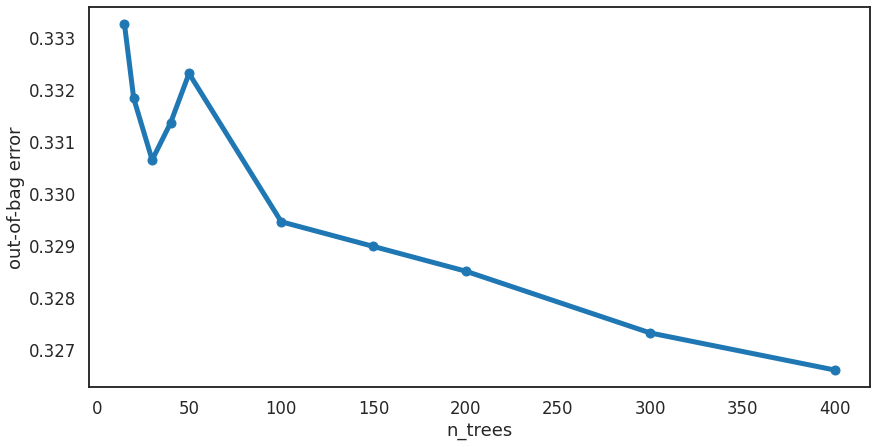

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.333254
20.0,0.332305
30.0,0.330169
40.0,0.331593
50.0,0.331593
100.0,0.330169
150.0,0.329931
200.0,0.329931
300.0,0.327795


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.333254,0.333254
20.0,0.331830,0.332305
30.0,0.330643,0.330169
40.0,0.331355,0.331593
50.0,0.332305,0.331593
100.0,0.329456,0.330169
150.0,0.328982,0.329931
200.0,0.328507,0.329931
300.0,0.327320,0.327795


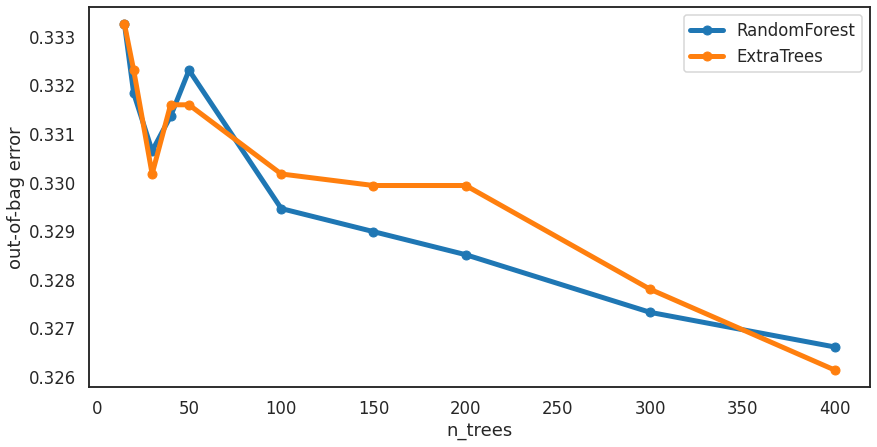

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       831
           1       0.68      0.74      0.71       975

    accuracy                           0.67      1806
   macro avg       0.67      0.66      0.66      1806
weighted avg       0.67      0.67      0.67      1806



,accuracy,precision,recall,f1,auc
0,0.667774,0.67672,0.73641,0.705305,0.661827


### Fasttext

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_df_embeddings_fasttext
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.419549
20.0,0.411472
30.0,0.396770
40.0,0.383930
50.0,0.381445
100.0,0.361358
150.0,0.368192
200.0,0.357631
300.0,0.353696


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

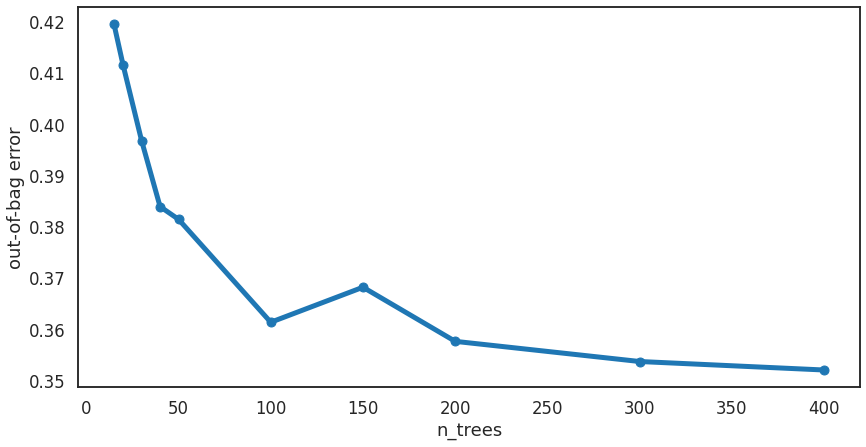

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.412508
20.0,0.413750
30.0,0.408159
40.0,0.391385
50.0,0.383516
100.0,0.364672
150.0,0.358873
200.0,0.355767
300.0,0.351211


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.419549,0.412508
20.0,0.411472,0.413750
30.0,0.396770,0.408159
40.0,0.383930,0.391385
50.0,0.381445,0.383516
100.0,0.361358,0.364672
150.0,0.368192,0.358873
200.0,0.357631,0.355767
300.0,0.353696,0.351211


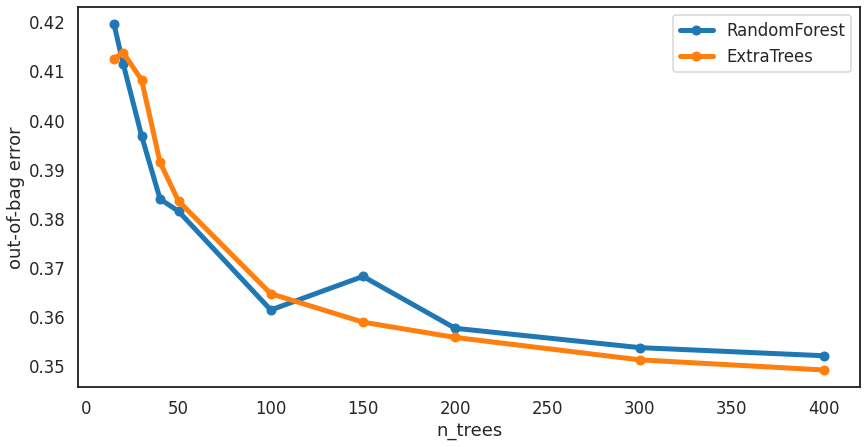

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1082
           1       0.68      0.58      0.63       988

    accuracy                           0.67      2070
   macro avg       0.67      0.66      0.66      2070
weighted avg       0.67      0.67      0.67      2070



,accuracy,precision,recall,f1,auc
0,0.668116,0.676436,0.584008,0.626833,0.664462


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_df_embeddings_fasttext
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.171612
20.0,0.151911
30.0,0.140517
40.0,0.133634
50.0,0.126988
100.0,0.118443
150.0,0.117968
200.0,0.115595
300.0,0.113221


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

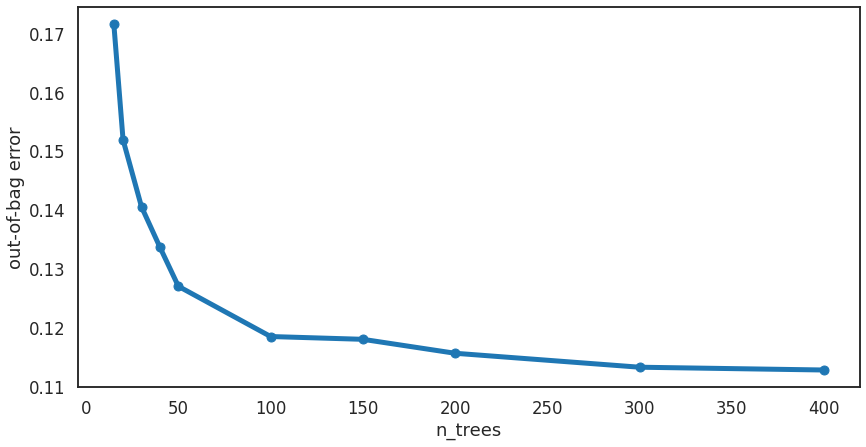

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.167339
20.0,0.152860
30.0,0.142179
40.0,0.138856
50.0,0.131498
100.0,0.121529
150.0,0.117019
200.0,0.117256
300.0,0.112984


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.171612,0.167339
20.0,0.151911,0.152860
30.0,0.140517,0.142179
40.0,0.133634,0.138856
50.0,0.126988,0.131498
100.0,0.118443,0.121529
150.0,0.117968,0.117019
200.0,0.115595,0.117256
300.0,0.113221,0.112984


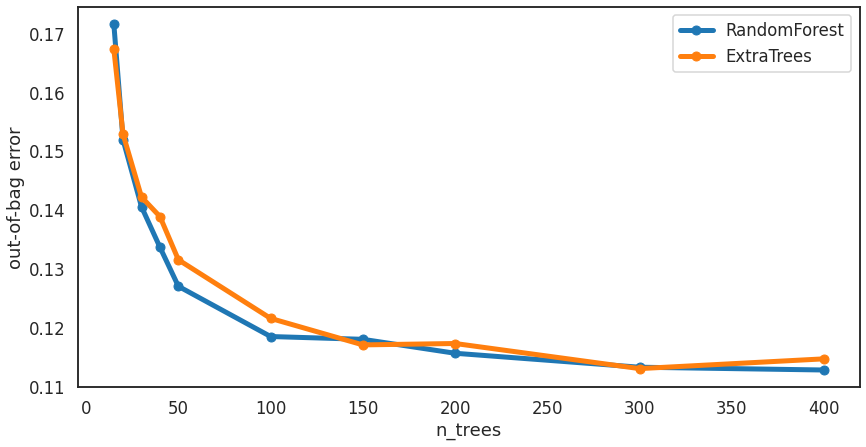

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       831
           1       0.93      0.87      0.90       975

    accuracy                           0.89      1806
   macro avg       0.89      0.90      0.89      1806
weighted avg       0.90      0.89      0.89      1806



,accuracy,precision,recall,f1,auc
0,0.894241,0.925163,0.874872,0.899315,0.89592


### Word2Vec

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_df_embeddings_word2vec
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.416649
20.0,0.405467
30.0,0.398840
40.0,0.389315
50.0,0.379375
100.0,0.377718
150.0,0.375026
200.0,0.369435
300.0,0.359495


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

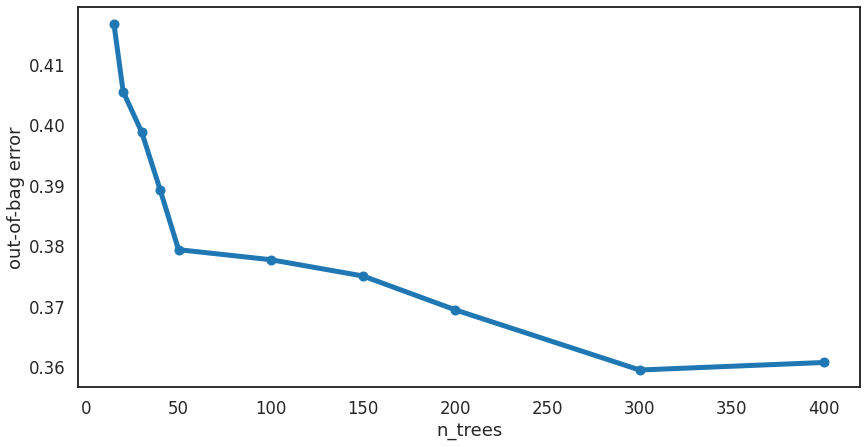

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.416235
20.0,0.412922
30.0,0.404224
40.0,0.391178
50.0,0.379168
100.0,0.366536
150.0,0.358459
200.0,0.362601
300.0,0.359288


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.416649,0.416235
20.0,0.405467,0.412922
30.0,0.398840,0.404224
40.0,0.389315,0.391178
50.0,0.379375,0.379168
100.0,0.377718,0.366536
150.0,0.375026,0.358459
200.0,0.369435,0.362601
300.0,0.359495,0.359288


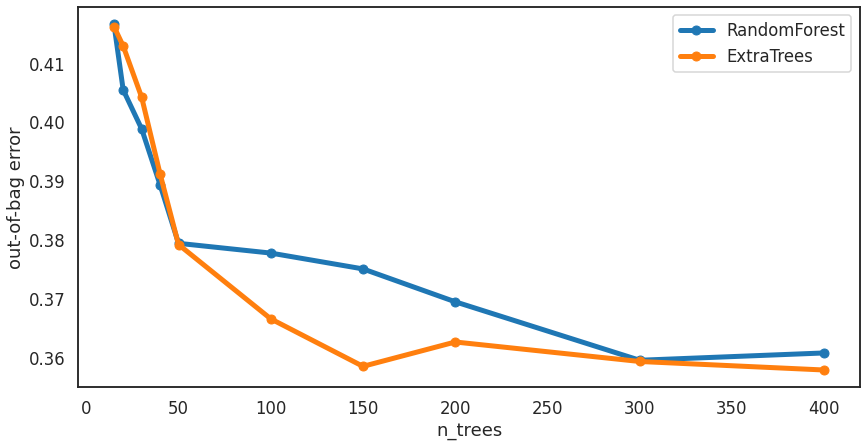

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.66      0.74      0.69      1082
           1       0.67      0.58      0.62       988

    accuracy                           0.66      2070
   macro avg       0.66      0.66      0.66      2070
weighted avg       0.66      0.66      0.66      2070



,accuracy,precision,recall,f1,auc
0,0.66087,0.667447,0.576923,0.618893,0.657223


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_df_embeddings_word2vec
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.167814
20.0,0.152148
30.0,0.136482
40.0,0.133159
50.0,0.128412
100.0,0.123190
150.0,0.117256
200.0,0.118680
300.0,0.114883


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

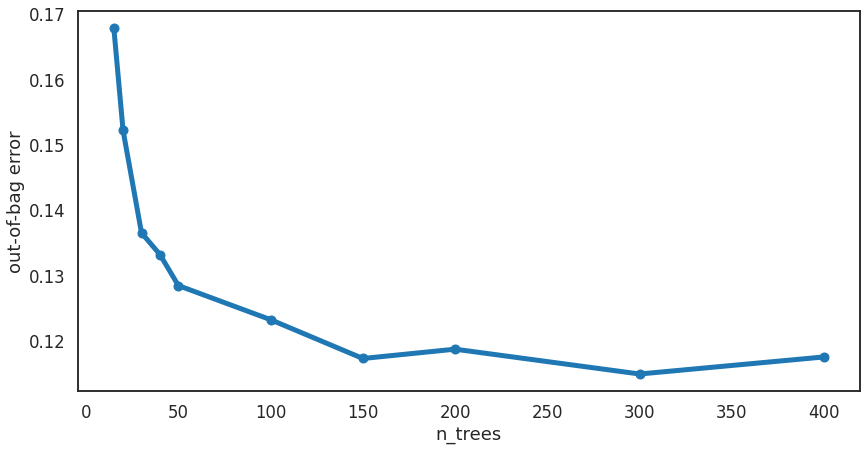

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.169713
20.0,0.160456
30.0,0.138144
40.0,0.134346
50.0,0.132210
100.0,0.120817
150.0,0.117731
200.0,0.116307
300.0,0.118206


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.167814,0.169713
20.0,0.152148,0.160456
30.0,0.136482,0.138144
40.0,0.133159,0.134346
50.0,0.128412,0.132210
100.0,0.123190,0.120817
150.0,0.117256,0.117731
200.0,0.118680,0.116307
300.0,0.114883,0.118206


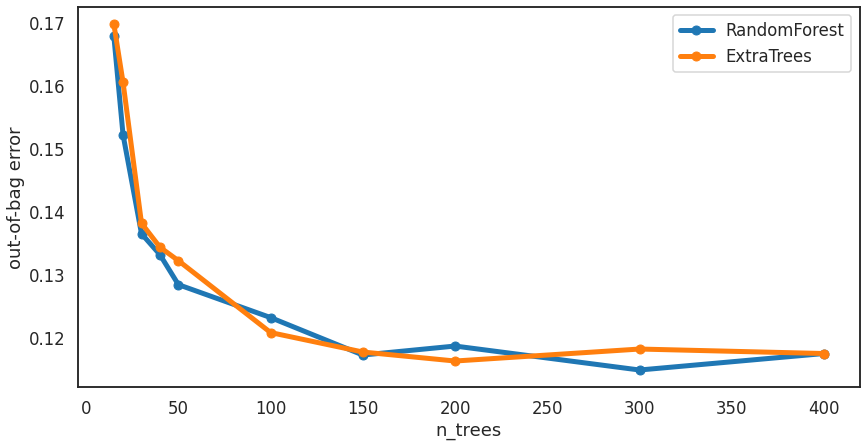

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       831
           1       0.93      0.86      0.90       975

    accuracy                           0.89      1806
   macro avg       0.89      0.89      0.89      1806
weighted avg       0.90      0.89      0.89      1806



,accuracy,precision,recall,f1,auc
0,0.892027,0.933333,0.861538,0.896,0.894668


### Glove

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_df_embeddings_glove
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.412922
20.0,0.412508
30.0,0.402154
40.0,0.397184
50.0,0.392214
100.0,0.370884
150.0,0.367157
200.0,0.361980
300.0,0.363636


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

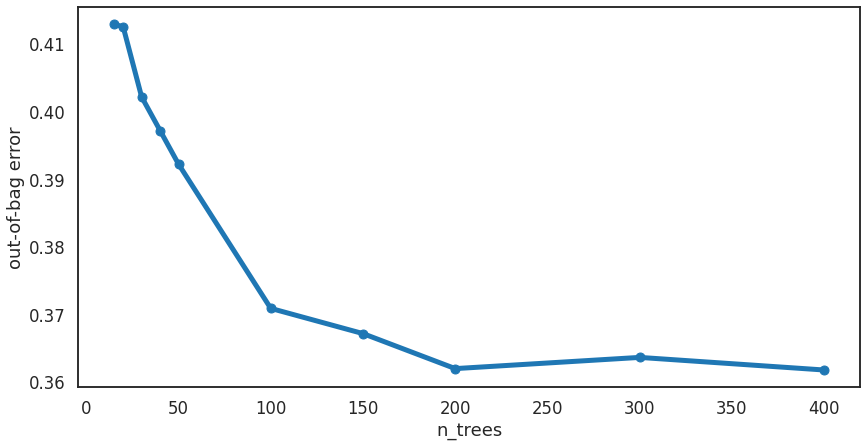

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.432802
20.0,0.423897
30.0,0.411679
40.0,0.402361
50.0,0.398426
100.0,0.376268
150.0,0.371298
200.0,0.365086
300.0,0.362601


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.412922,0.432802
20.0,0.412508,0.423897
30.0,0.402154,0.411679
40.0,0.397184,0.402361
50.0,0.392214,0.398426
100.0,0.370884,0.376268
150.0,0.367157,0.371298
200.0,0.361980,0.365086
300.0,0.363636,0.362601


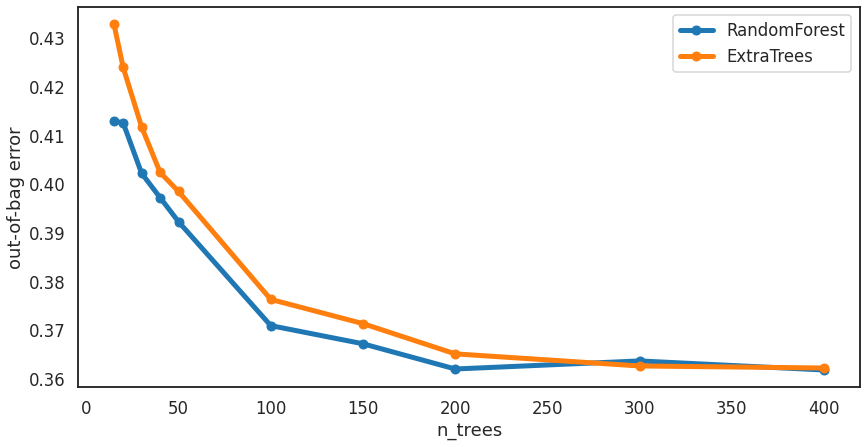

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.66      0.74      0.69      1082
           1       0.67      0.58      0.62       988

    accuracy                           0.66      2070
   macro avg       0.66      0.66      0.66      2070
weighted avg       0.66      0.66      0.66      2070



,accuracy,precision,recall,f1,auc
0,0.661836,0.667442,0.580972,0.621212,0.658323


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_df_embeddings_glove
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.160218
20.0,0.145977
30.0,0.140517
40.0,0.131735
50.0,0.128175
100.0,0.121054
150.0,0.116544
200.0,0.115595
300.0,0.115120


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

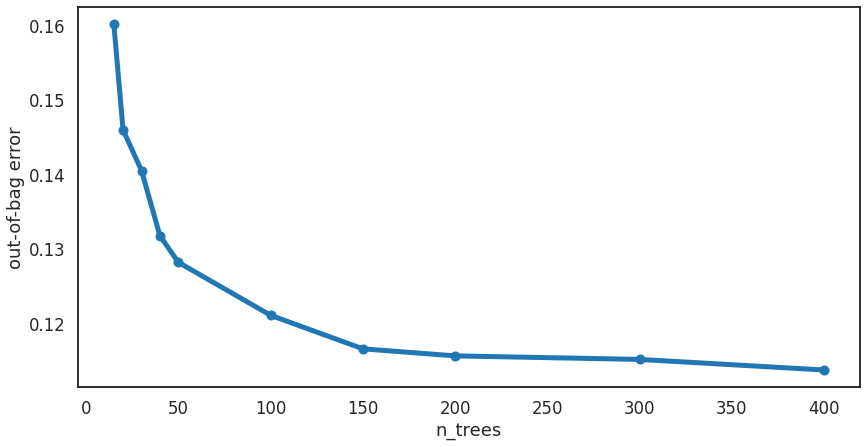

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.178495
20.0,0.165678
30.0,0.145977
40.0,0.139568
50.0,0.132210
100.0,0.123665
150.0,0.117968
200.0,0.114883
300.0,0.114408


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.160218,0.178495
20.0,0.145977,0.165678
30.0,0.140517,0.145977
40.0,0.131735,0.139568
50.0,0.128175,0.132210
100.0,0.121054,0.123665
150.0,0.116544,0.117968
200.0,0.115595,0.114883
300.0,0.115120,0.114408


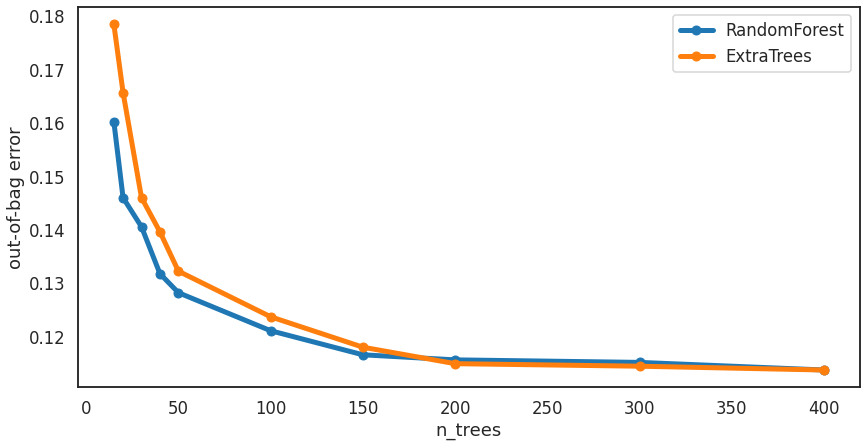

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       831
           1       0.92      0.87      0.89       975

    accuracy                           0.89      1806
   macro avg       0.89      0.89      0.89      1806
weighted avg       0.89      0.89      0.89      1806



,accuracy,precision,recall,f1,auc
0,0.889258,0.923497,0.866667,0.89418,0.891215


### Bert

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_df_bert_input
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.398426
20.0,0.388072
30.0,0.377511
40.0,0.368192
50.0,0.358252
100.0,0.347484
150.0,0.346034
200.0,0.342721
300.0,0.342100


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

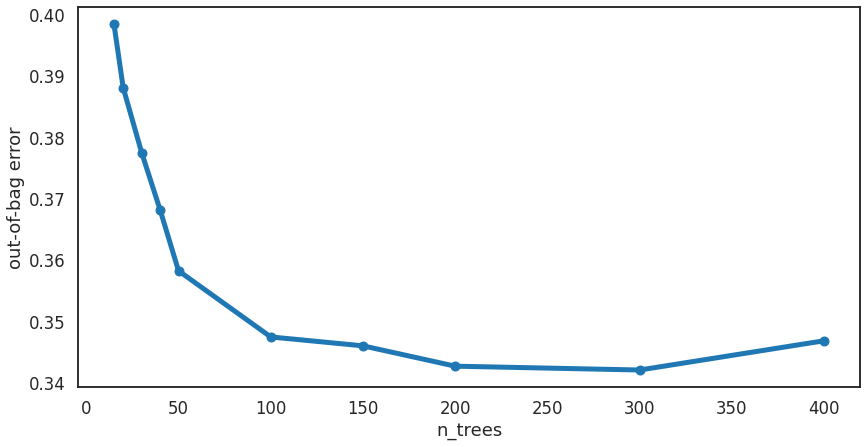

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.426589
20.0,0.412094
30.0,0.403603
40.0,0.390557
50.0,0.386001
100.0,0.365293
150.0,0.363636
200.0,0.354939
300.0,0.355146


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.398426,0.426589
20.0,0.388072,0.412094
30.0,0.377511,0.403603
40.0,0.368192,0.390557
50.0,0.358252,0.386001
100.0,0.347484,0.365293
150.0,0.346034,0.363636
200.0,0.342721,0.354939
300.0,0.342100,0.355146


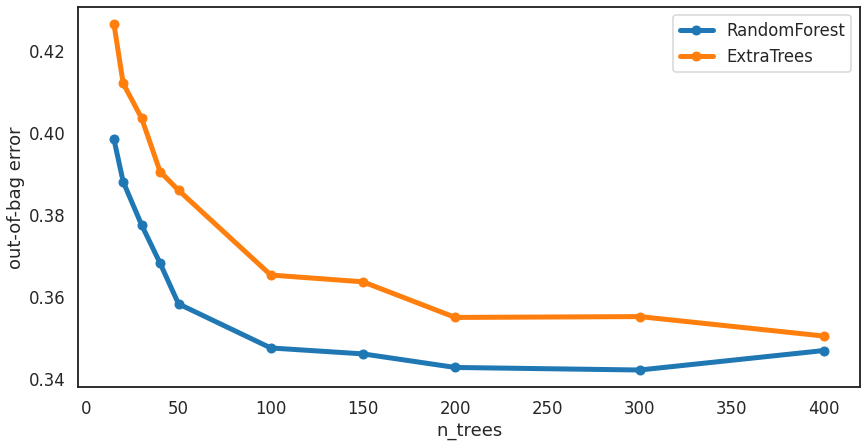

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1082
           1       0.67      0.56      0.61       988

    accuracy                           0.66      2070
   macro avg       0.66      0.65      0.65      2070
weighted avg       0.66      0.66      0.65      2070



,accuracy,precision,recall,f1,auc
0,0.657488,0.667467,0.562753,0.610653,0.653373


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_df_bert_input
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.265369
20.0,0.259435
30.0,0.242108
40.0,0.231427
50.0,0.224068
100.0,0.208165
150.0,0.200095
200.0,0.198908
300.0,0.198908


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

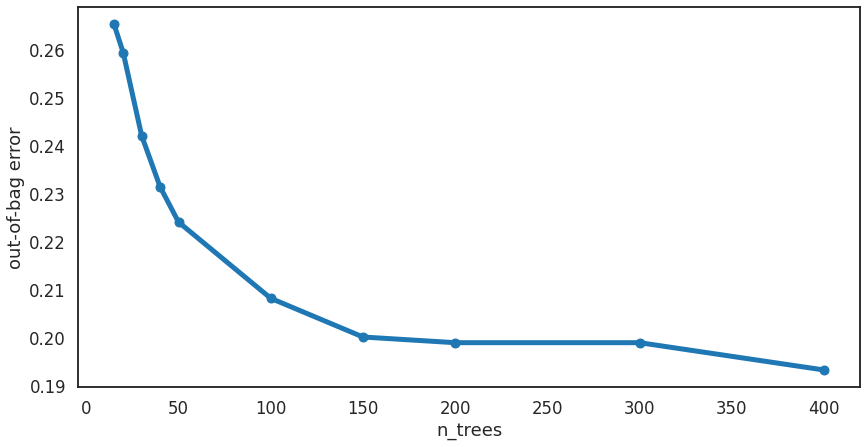

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.278424
20.0,0.256824
30.0,0.253501
40.0,0.246855
50.0,0.242582
100.0,0.227154
150.0,0.230240
200.0,0.222644
300.0,0.215523


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.265369,0.278424
20.0,0.259435,0.256824
30.0,0.242108,0.253501
40.0,0.231427,0.246855
50.0,0.224068,0.242582
100.0,0.208165,0.227154
150.0,0.200095,0.230240
200.0,0.198908,0.222644
300.0,0.198908,0.215523


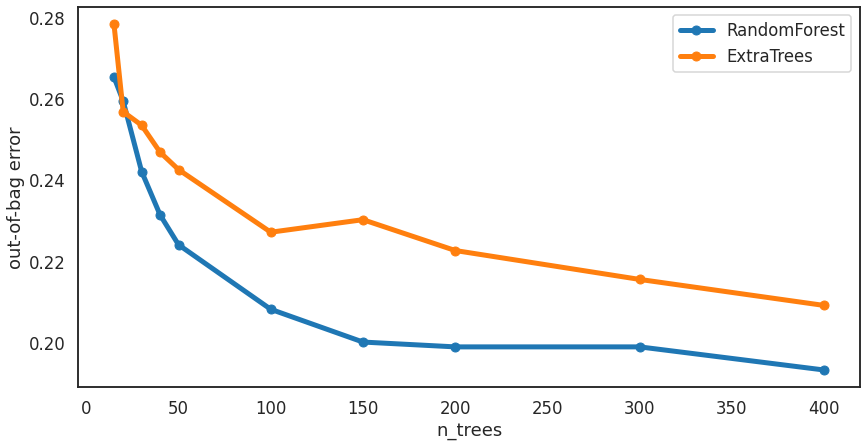

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       831
           1       0.84      0.81      0.83       975

    accuracy                           0.82      1806
   macro avg       0.82      0.82      0.82      1806
weighted avg       0.82      0.82      0.82      1806



,accuracy,precision,recall,f1,auc
0,0.816722,0.843284,0.811282,0.826973,0.817193


### TF-IDF

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_df_tfidf_1gram
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.304204
20.0,0.297991
30.0,0.280803
40.0,0.272727
50.0,0.268171
100.0,0.256782
150.0,0.254297
200.0,0.254090
300.0,0.250362


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

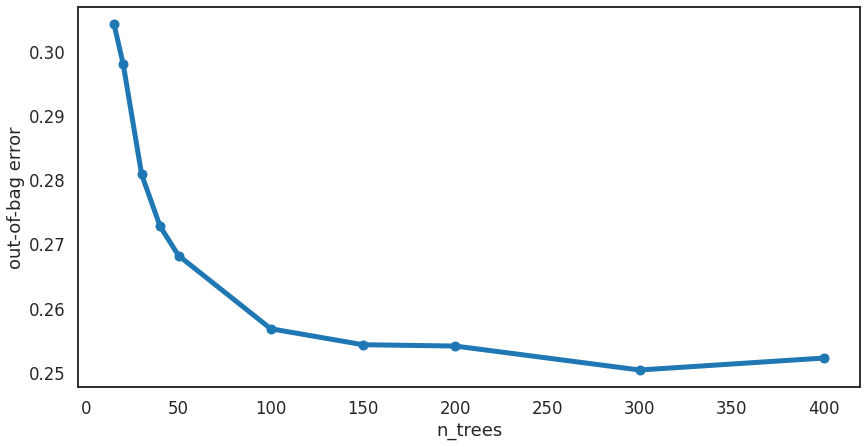

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.294264
20.0,0.295299
30.0,0.271485
40.0,0.264651
50.0,0.266308
100.0,0.252847
150.0,0.248913
200.0,0.248292
300.0,0.248499


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.304204,0.294264
20.0,0.297991,0.295299
30.0,0.280803,0.271485
40.0,0.272727,0.264651
50.0,0.268171,0.266308
100.0,0.256782,0.252847
150.0,0.254297,0.248913
200.0,0.254090,0.248292
300.0,0.250362,0.248499


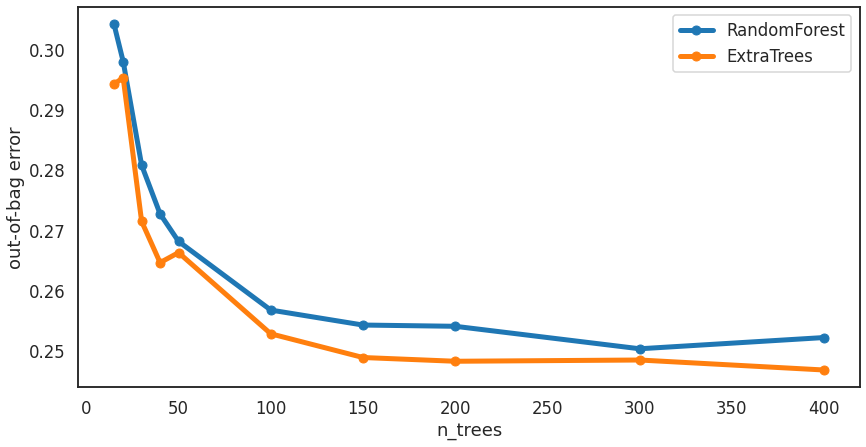

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1082
           1       0.81      0.70      0.75       988

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



,accuracy,precision,recall,f1,auc
0,0.779227,0.808362,0.704453,0.752839,0.775979


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_df_tfidf_1gram
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.056729
20.0,0.052219
30.0,0.043437
40.0,0.039877
50.0,0.041063
100.0,0.040114
150.0,0.038452
200.0,0.037503
300.0,0.037978


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

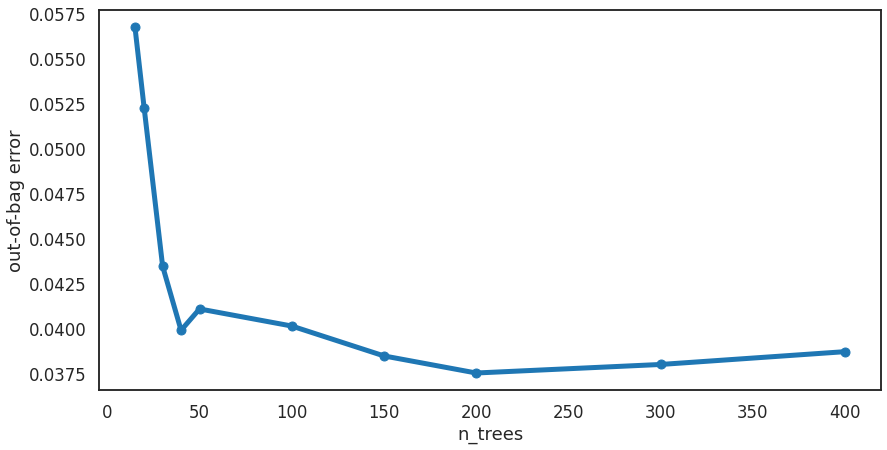

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.063613
20.0,0.051270
30.0,0.050320
40.0,0.049134
50.0,0.047472
100.0,0.042013
150.0,0.041301
200.0,0.041775
300.0,0.042250


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.056729,0.063613
20.0,0.052219,0.051270
30.0,0.043437,0.050320
40.0,0.039877,0.049134
50.0,0.041063,0.047472
100.0,0.040114,0.042013
150.0,0.038452,0.041301
200.0,0.037503,0.041775
300.0,0.037978,0.042250


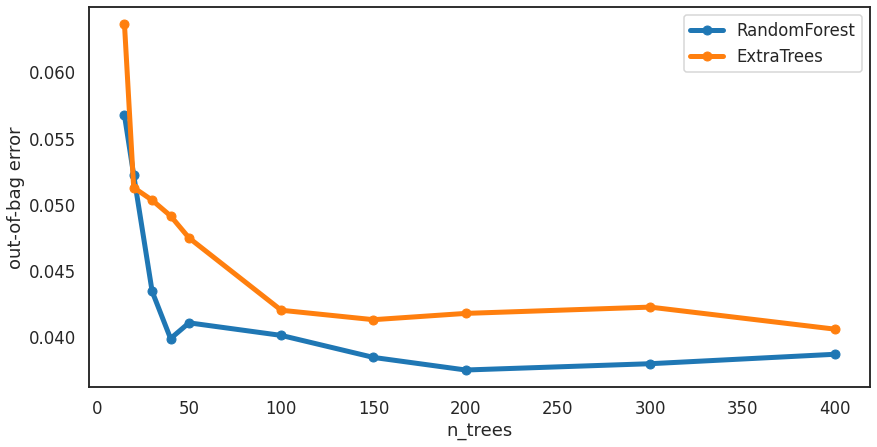

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       831
           1       0.99      0.94      0.96       975

    accuracy                           0.96      1806
   macro avg       0.96      0.96      0.96      1806
weighted avg       0.96      0.96      0.96      1806



,accuracy,precision,recall,f1,auc
0,0.959025,0.985976,0.937436,0.961094,0.960896


### TF-IDF + hashtags + Retweets + POS + FT

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_TFIDF_HT_RT_POS_FT
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.410230
20.0,0.396562
30.0,0.395941
40.0,0.380824
50.0,0.365914
100.0,0.340236
150.0,0.334231
200.0,0.324498
300.0,0.320149


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

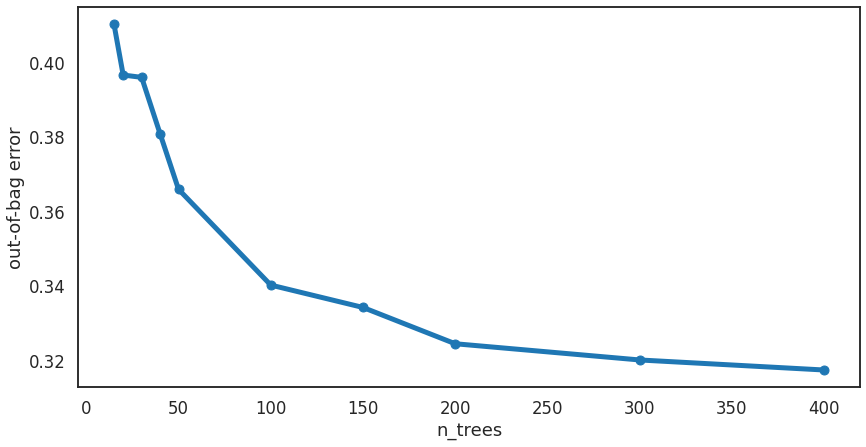

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.390143
20.0,0.373576
30.0,0.349348
40.0,0.337130
50.0,0.332574
100.0,0.306482
150.0,0.304204
200.0,0.298820
300.0,0.296542


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.410230,0.390143
20.0,0.396562,0.373576
30.0,0.395941,0.349348
40.0,0.380824,0.337130
50.0,0.365914,0.332574
100.0,0.340236,0.306482
150.0,0.334231,0.304204
200.0,0.324498,0.298820
300.0,0.320149,0.296542


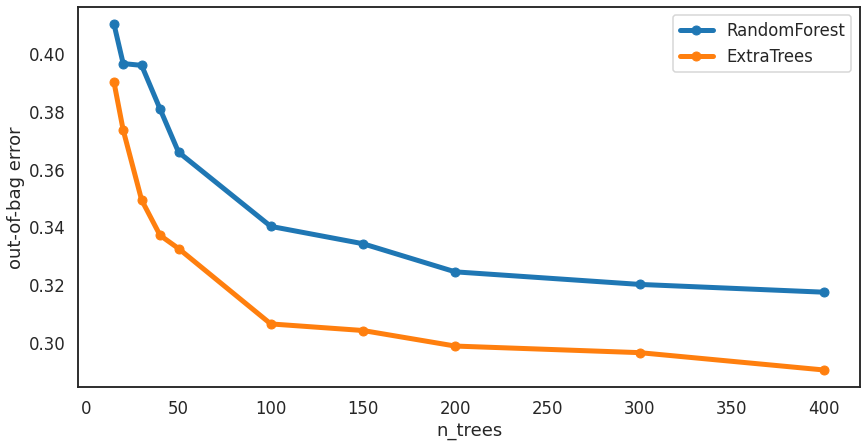

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1082
           1       0.70      0.63      0.67       988

    accuracy                           0.70      2070
   macro avg       0.70      0.70      0.70      2070
weighted avg       0.70      0.70      0.70      2070



,accuracy,precision,recall,f1,auc
0,0.698068,0.703704,0.634615,0.667376,0.695311


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_TFIDF_HT_RT_POS_FT
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.142416
20.0,0.134583
30.0,0.112272
40.0,0.098505
50.0,0.094232
100.0,0.078329
150.0,0.074056
200.0,0.073107
300.0,0.070259


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

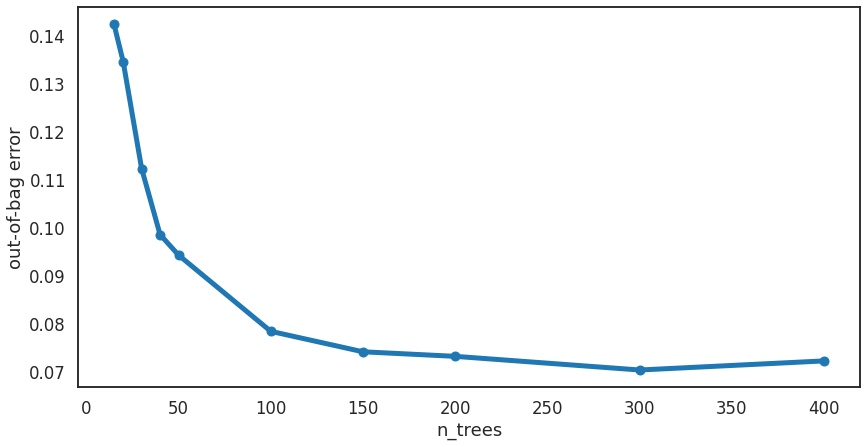

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.142416
20.0,0.115832
30.0,0.106338
40.0,0.093995
50.0,0.085212
100.0,0.078566
150.0,0.074294
200.0,0.070496
300.0,0.069309


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.142416,0.142416
20.0,0.134583,0.115832
30.0,0.112272,0.106338
40.0,0.098505,0.093995
50.0,0.094232,0.085212
100.0,0.078329,0.078566
150.0,0.074056,0.074294
200.0,0.073107,0.070496
300.0,0.070259,0.069309


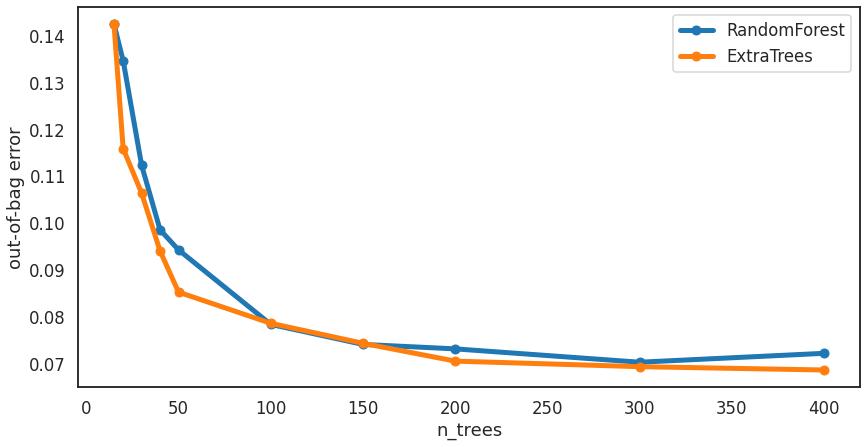

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       831
           1       0.96      0.90      0.93       975

    accuracy                           0.93      1806
   macro avg       0.93      0.93      0.93      1806
weighted avg       0.93      0.93      0.93      1806



,accuracy,precision,recall,f1,auc
0,0.928018,0.964796,0.899487,0.930998,0.93049


### TF-IDF + hashtags + Retweets + POS + word2vec

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_TFIDF_HT_RT_POS_w2v
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.416028
20.0,0.404846
30.0,0.393663
40.0,0.374612
50.0,0.362601
100.0,0.346863
150.0,0.343342
200.0,0.334645
300.0,0.329468


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

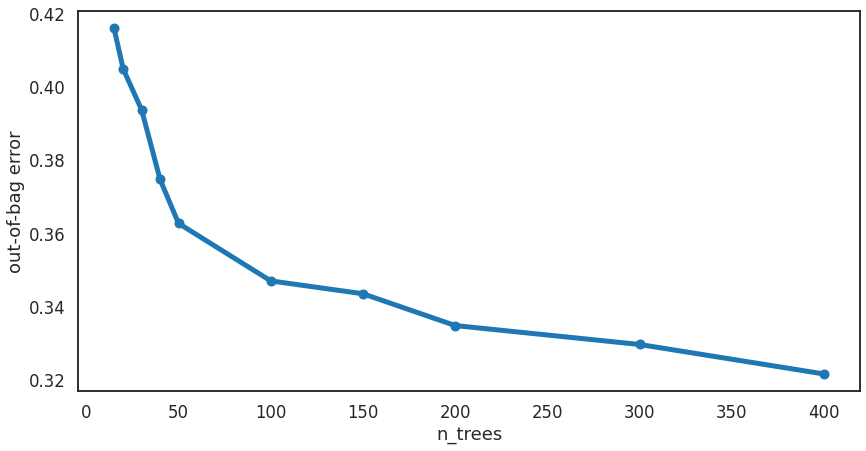

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.358873
20.0,0.347484
30.0,0.336923
40.0,0.324498
50.0,0.313522
100.0,0.302340
150.0,0.293435
200.0,0.289708
300.0,0.284945


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.416028,0.358873
20.0,0.404846,0.347484
30.0,0.393663,0.336923
40.0,0.374612,0.324498
50.0,0.362601,0.313522
100.0,0.346863,0.302340
150.0,0.343342,0.293435
200.0,0.334645,0.289708
300.0,0.329468,0.284945


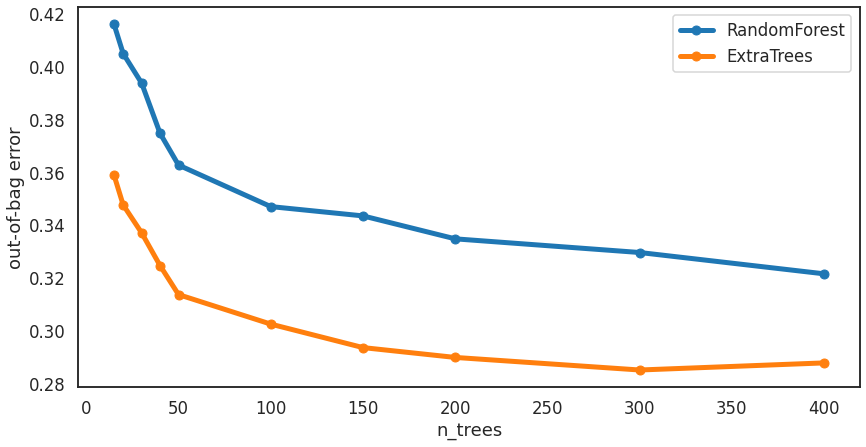

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.68      0.75      0.72      1082
           1       0.70      0.62      0.65       988

    accuracy                           0.69      2070
   macro avg       0.69      0.69      0.69      2070
weighted avg       0.69      0.69      0.69      2070



,accuracy,precision,recall,f1,auc
0,0.688889,0.6959,0.618421,0.654877,0.685828


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_TFIDF_HT_RT_POS_w2v
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.125089
20.0,0.111322
30.0,0.104439
40.0,0.098030
50.0,0.093757
100.0,0.080703
150.0,0.075955
200.0,0.076430
300.0,0.073582


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

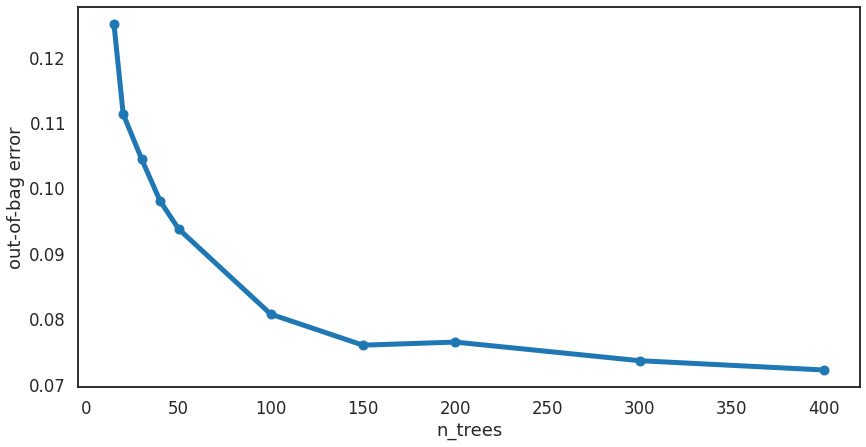

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.142891
20.0,0.129599
30.0,0.103252
40.0,0.091859
50.0,0.088535
100.0,0.079516
150.0,0.071920
200.0,0.070733
300.0,0.069309


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.125089,0.142891
20.0,0.111322,0.129599
30.0,0.104439,0.103252
40.0,0.098030,0.091859
50.0,0.093757,0.088535
100.0,0.080703,0.079516
150.0,0.075955,0.071920
200.0,0.076430,0.070733
300.0,0.073582,0.069309


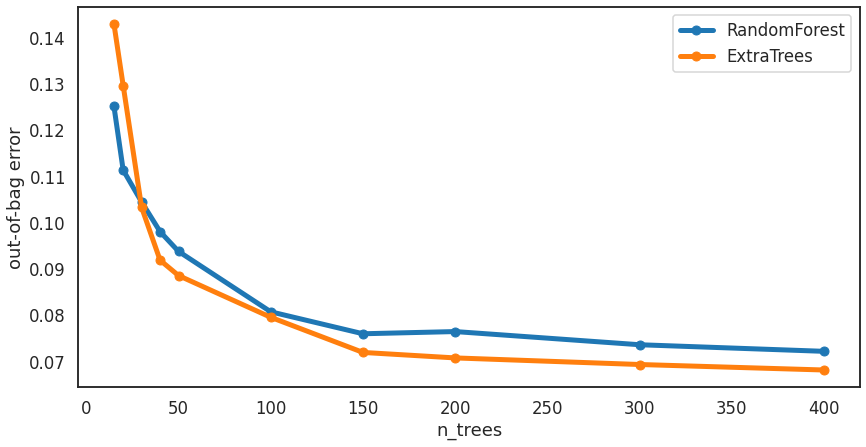

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       831
           1       0.96      0.90      0.93       975

    accuracy                           0.93      1806
   macro avg       0.93      0.93      0.93      1806
weighted avg       0.93      0.93      0.93      1806



,accuracy,precision,recall,f1,auc
0,0.925249,0.963576,0.895385,0.92823,0.927837


### TF-IDF + hashtags + Retweets + POS + Glove

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_TFIDF_HT_RT_POS_glove
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.400083
20.0,0.386208
30.0,0.374198
40.0,0.364672
50.0,0.360323
100.0,0.332367
150.0,0.333402
200.0,0.330917
300.0,0.324291


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

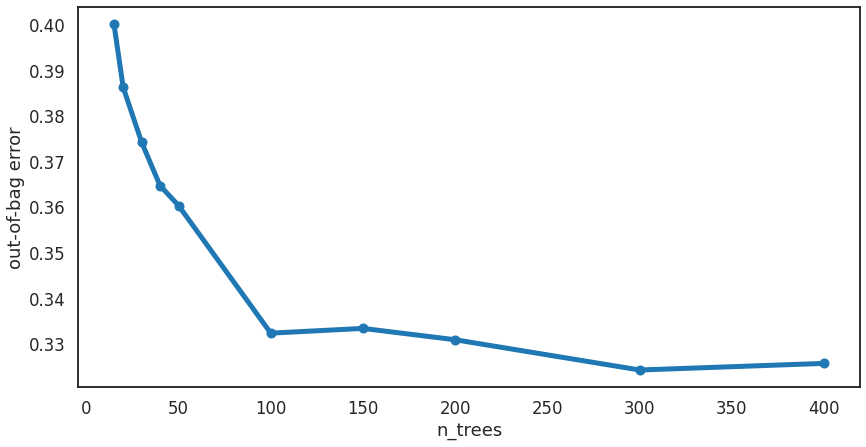

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.373990
20.0,0.373990
30.0,0.359909
40.0,0.341686
50.0,0.328847
100.0,0.306275
150.0,0.301098
200.0,0.296128
300.0,0.288051


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.400083,0.373990
20.0,0.386208,0.373990
30.0,0.374198,0.359909
40.0,0.364672,0.341686
50.0,0.360323,0.328847
100.0,0.332367,0.306275
150.0,0.333402,0.301098
200.0,0.330917,0.296128
300.0,0.324291,0.288051


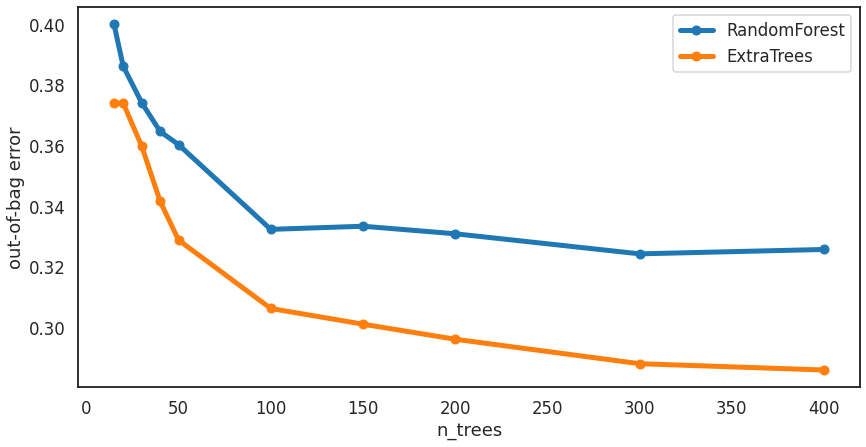

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1082
           1       0.70      0.63      0.67       988

    accuracy                           0.70      2070
   macro avg       0.70      0.69      0.69      2070
weighted avg       0.70      0.70      0.69      2070



,accuracy,precision,recall,f1,auc
0,0.695652,0.700224,0.633603,0.66525,0.692957


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_TFIDF_HT_RT_POS_glove
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.138619
20.0,0.128649
30.0,0.103252
40.0,0.090672
50.0,0.089485
100.0,0.074294
150.0,0.074769
200.0,0.075243
300.0,0.075718


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

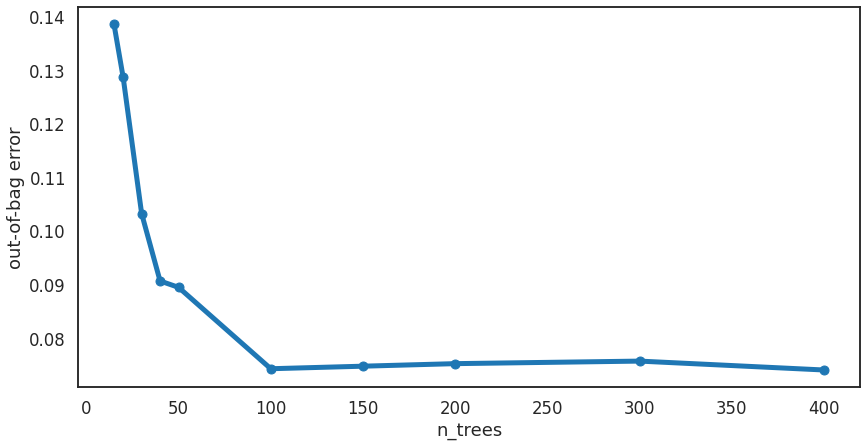

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.150487
20.0,0.126751
30.0,0.110373
40.0,0.099691
50.0,0.091621
100.0,0.076193
150.0,0.075006
200.0,0.072632
300.0,0.069309


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.138619,0.150487
20.0,0.128649,0.126751
30.0,0.103252,0.110373
40.0,0.090672,0.099691
50.0,0.089485,0.091621
100.0,0.074294,0.076193
150.0,0.074769,0.075006
200.0,0.075243,0.072632
300.0,0.075718,0.069309


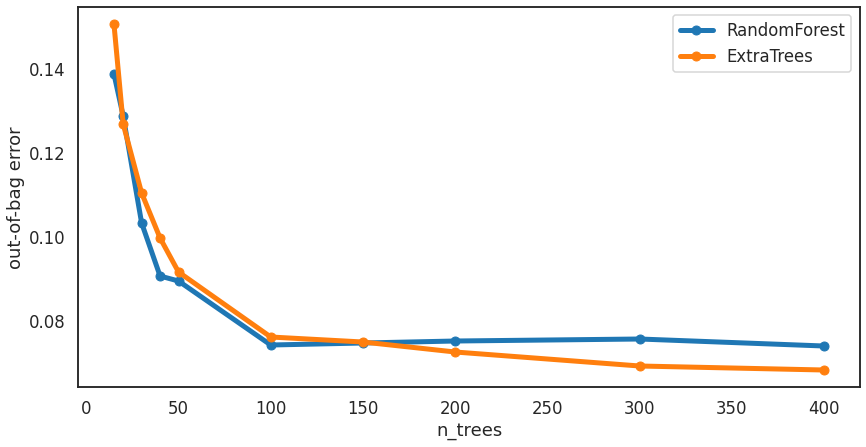

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       831
           1       0.96      0.90      0.93       975

    accuracy                           0.93      1806
   macro avg       0.93      0.93      0.93      1806
weighted avg       0.93      0.93      0.93      1806



,accuracy,precision,recall,f1,auc
0,0.92691,0.961665,0.900513,0.930085,0.929197


### TF-IDF + hashtags + Retweets + POS + bert

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_TFIDF_HT_RT_POS_bert
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.335266
20.0,0.323669
30.0,0.302340
40.0,0.297163
50.0,0.296128
100.0,0.276662
150.0,0.272313
200.0,0.269207
300.0,0.269828


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

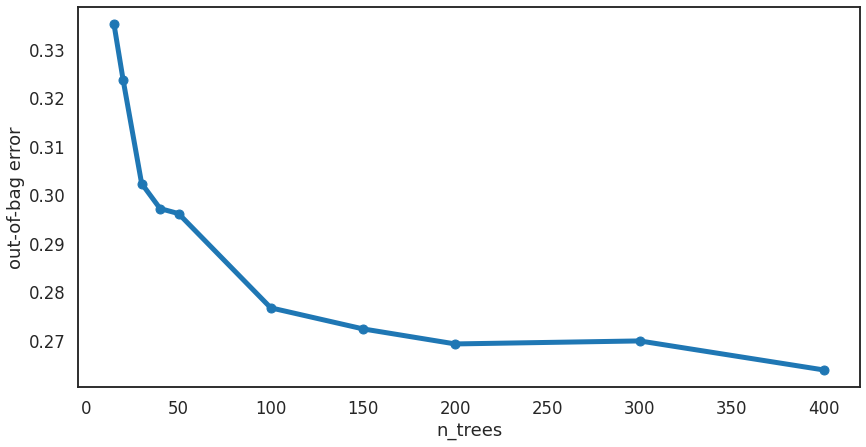

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.322220
20.0,0.314558
30.0,0.307724
40.0,0.294264
50.0,0.288673
100.0,0.267343
150.0,0.259474
200.0,0.257610
300.0,0.258232


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.335266,0.322220
20.0,0.323669,0.314558
30.0,0.302340,0.307724
40.0,0.297163,0.294264
50.0,0.296128,0.288673
100.0,0.276662,0.267343
150.0,0.272313,0.259474
200.0,0.269207,0.257610
300.0,0.269828,0.258232


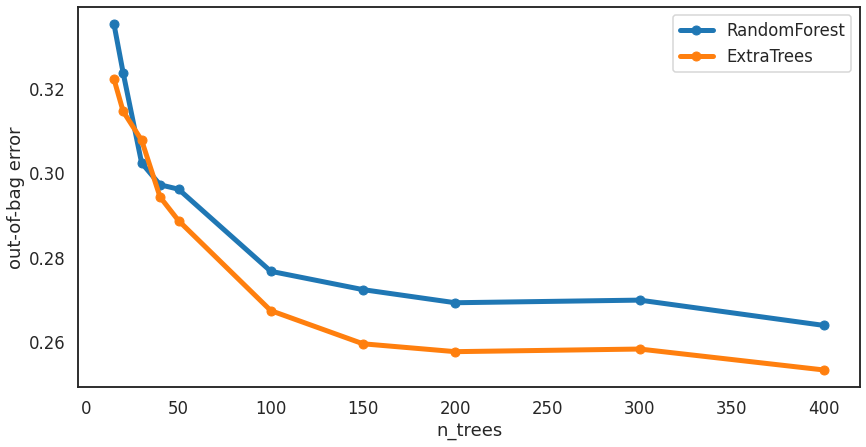

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.73      0.85      0.78      1082
           1       0.80      0.65      0.72       988

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



,accuracy,precision,recall,f1,auc
0,0.754589,0.797767,0.65081,0.716834,0.750081


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_TFIDF_HT_RT_POS_bert
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.077854
20.0,0.067648
30.0,0.055780
40.0,0.050795
50.0,0.049134
100.0,0.046048
150.0,0.044861
200.0,0.044624
300.0,0.046285


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

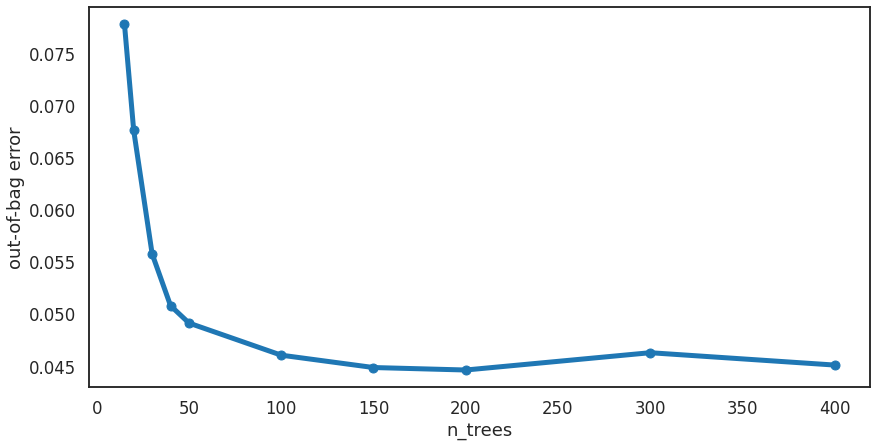

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.071920
20.0,0.061714
30.0,0.056017
40.0,0.053169
50.0,0.051507
100.0,0.045099
150.0,0.046285
200.0,0.043674
300.0,0.042962


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.077854,0.071920
20.0,0.067648,0.061714
30.0,0.055780,0.056017
40.0,0.050795,0.053169
50.0,0.049134,0.051507
100.0,0.046048,0.045099
150.0,0.044861,0.046285
200.0,0.044624,0.043674
300.0,0.046285,0.042962


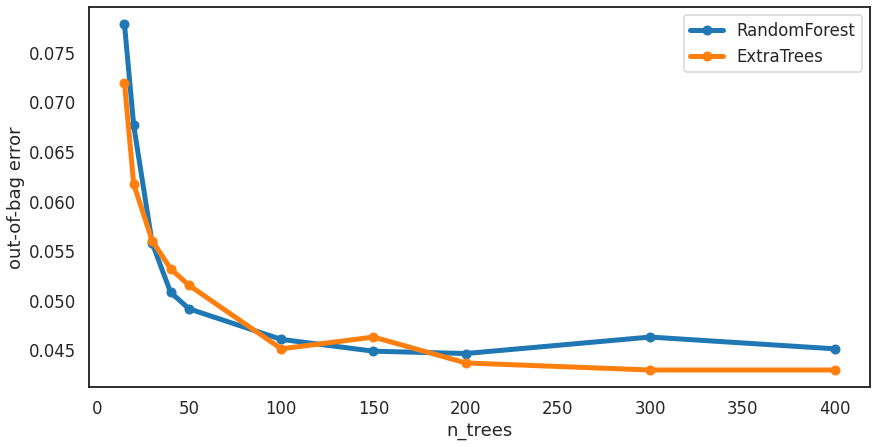

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       831
           1       0.99      0.93      0.96       975

    accuracy                           0.96      1806
   macro avg       0.96      0.96      0.96      1806
weighted avg       0.96      0.96      0.96      1806



,accuracy,precision,recall,f1,auc
0,0.955703,0.989071,0.928205,0.957672,0.958086


### HT + POS + TF-IDF

#### Nepal

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = NepalEQ_TFIDF_HT_POS
y = NepalEQ_df_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2524, 1: 2305})
Counter({0: 1082, 1: 988})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.310830
20.0,0.300269
30.0,0.283910
40.0,0.276248
50.0,0.271899
100.0,0.263409
150.0,0.265272
200.0,0.260095
300.0,0.257403


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

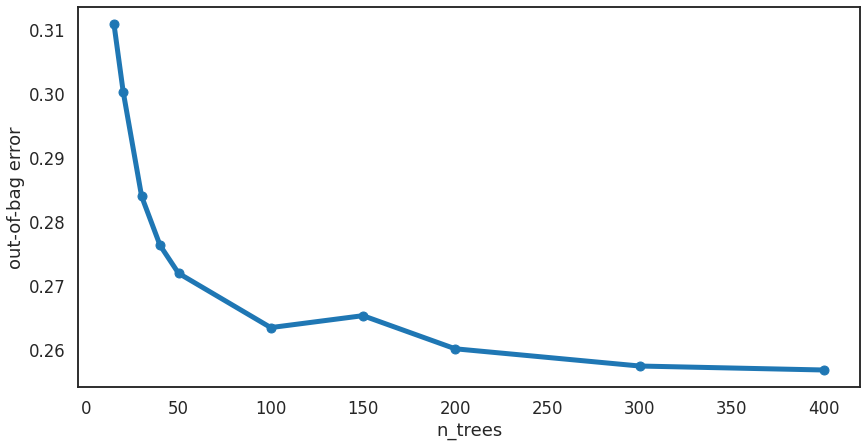

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.310830
20.0,0.301098
30.0,0.292400
40.0,0.278526
50.0,0.267757
100.0,0.259060
150.0,0.258439
200.0,0.255125
300.0,0.253469


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.310830,0.310830
20.0,0.300269,0.301098
30.0,0.283910,0.292400
40.0,0.276248,0.278526
50.0,0.271899,0.267757
100.0,0.263409,0.259060
150.0,0.265272,0.258439
200.0,0.260095,0.255125
300.0,0.257403,0.253469


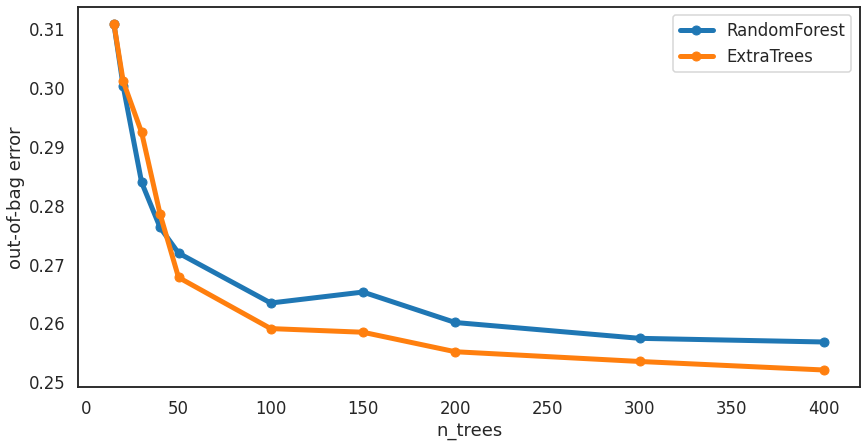

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1082
           1       0.79      0.70      0.75       988

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



,accuracy,precision,recall,f1,auc
0,0.771498,0.79496,0.702429,0.745836,0.768497


#### Queensland

In [ ]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X = QueenslandFLD_TFIDF_HT_POS
y = QueenslandFLD_target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2273, 0: 1940})
Counter({1: 975, 0: 831})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.057204
20.0,0.050320
30.0,0.045811
40.0,0.043437
50.0,0.043200
100.0,0.038690
150.0,0.038452
200.0,0.038452
300.0,0.038927


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

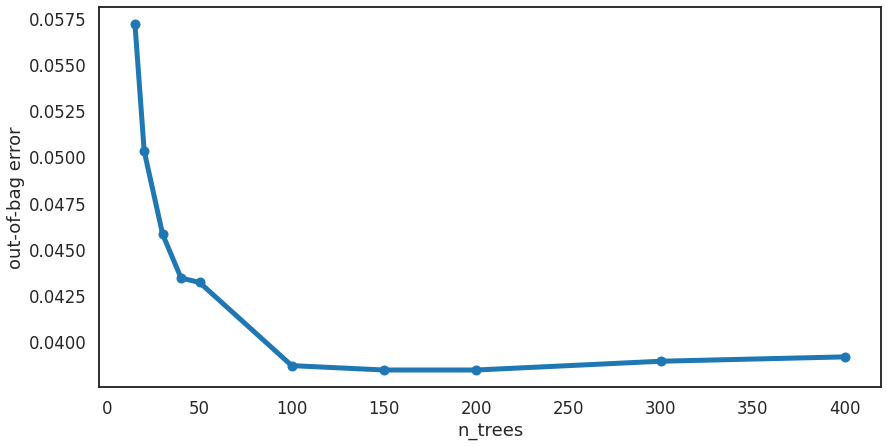

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.064562
20.0,0.051982
30.0,0.044861
40.0,0.042725
50.0,0.042488
100.0,0.040351
150.0,0.039402
200.0,0.041063
300.0,0.042725


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.057204,0.064562
20.0,0.050320,0.051982
30.0,0.045811,0.044861
40.0,0.043437,0.042725
50.0,0.043200,0.042488
100.0,0.038690,0.040351
150.0,0.038452,0.039402
200.0,0.038452,0.041063
300.0,0.038927,0.042725


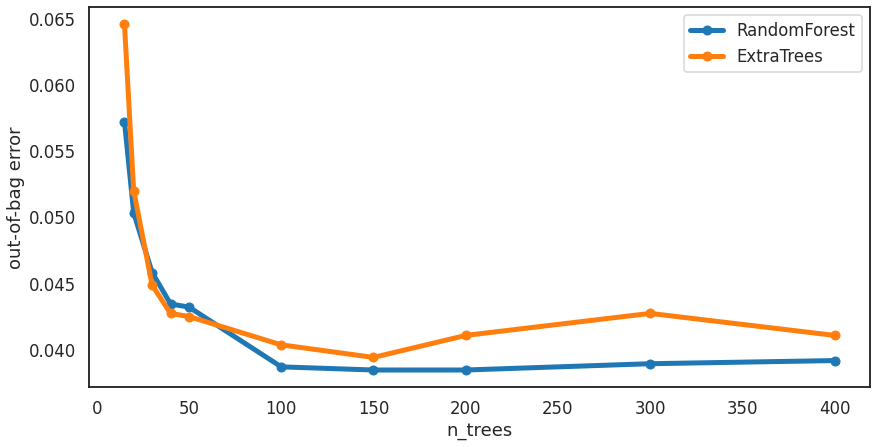

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

score_df

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       831
           1       0.99      0.94      0.96       975

    accuracy                           0.96      1806
   macro avg       0.96      0.96      0.96      1806
weighted avg       0.96      0.96      0.96      1806



,accuracy,precision,recall,f1,auc
0,0.962348,0.988159,0.941538,0.964286,0.964151
